In [987]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [988]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [989]:
df_1r = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True)

In [990]:
df_2r = pd.read_csv("Rose.csv",parse_dates=True ,squeeze=True,index_col=0)

In [991]:
print(df_2r.head())

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64


In [992]:
print(df_1r.head())
print(df_1r.tail())

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


In [993]:
date = pd.date_range(start='1/1/1980', end='1/9/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [994]:
df_1r['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])

df_1r.head()
#df_1.tail()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [995]:
df_1r = df_1r.fillna(method='ffill')


In [996]:
dfr = df_1r.set_index('Time_Stamp')
dfr.drop(['YearMonth'], axis=1, inplace=True)
dfr.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [997]:
df_1s = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True)

In [998]:
df_2s = pd.read_csv("Rose.csv",parse_dates=True ,squeeze=True,index_col=0)

In [999]:
print(df_1s.head())
print(df_1s.tail())

  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
    YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031


In [1000]:
df_2s = df_2s.fillna(method='ffill')

In [1001]:
print(df_2s.head())
print(df_2s.tail())

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64
YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64


In [1002]:
df_1s['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])

df_1s.head()
#df_1.tail()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [1003]:
dfs = df_1s.set_index('Time_Stamp')
dfs.drop(['YearMonth'], axis=1, inplace=True)
dfs.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

# PLOT TIME SERIES TO UNDERSTAND THE FIGURE

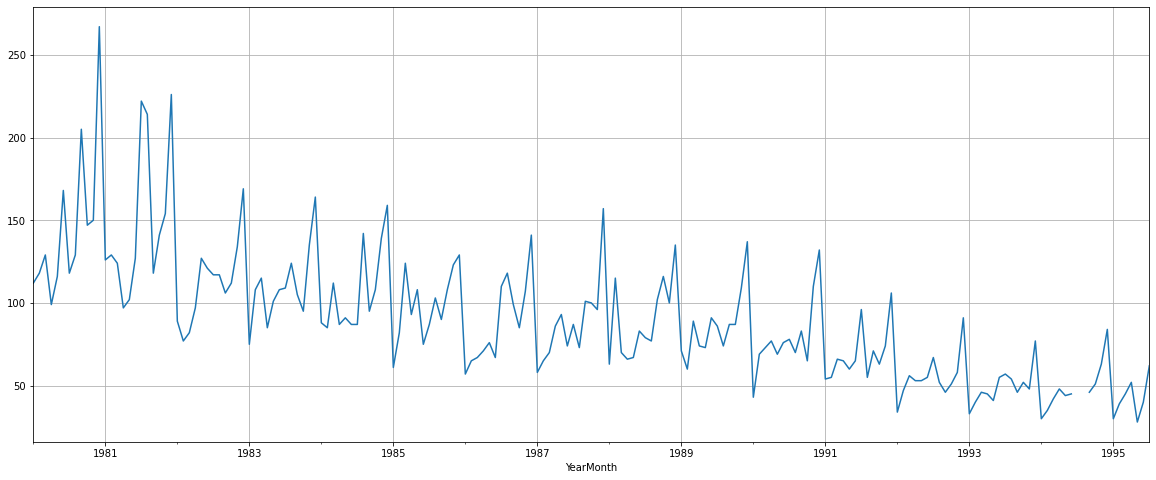

In [1004]:
df_2r.plot(figsize=(20,8))
plt.grid();
plt.savefig("1.jpg")

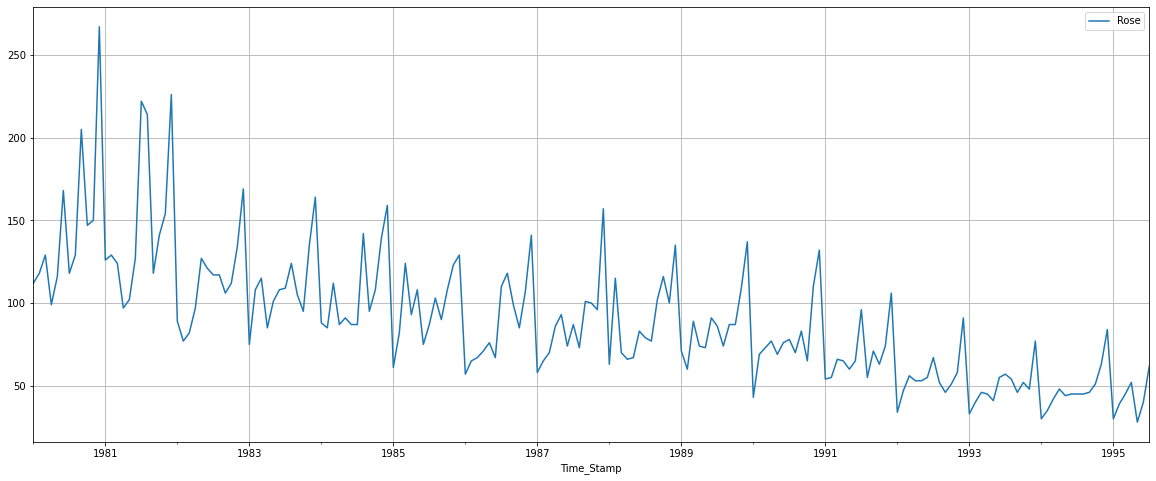

In [1005]:
dfr.plot(figsize=(20,8))
plt.grid();
plt.savefig("2.jpg")

#### There seems to be a trend and seasonality in rose wine company


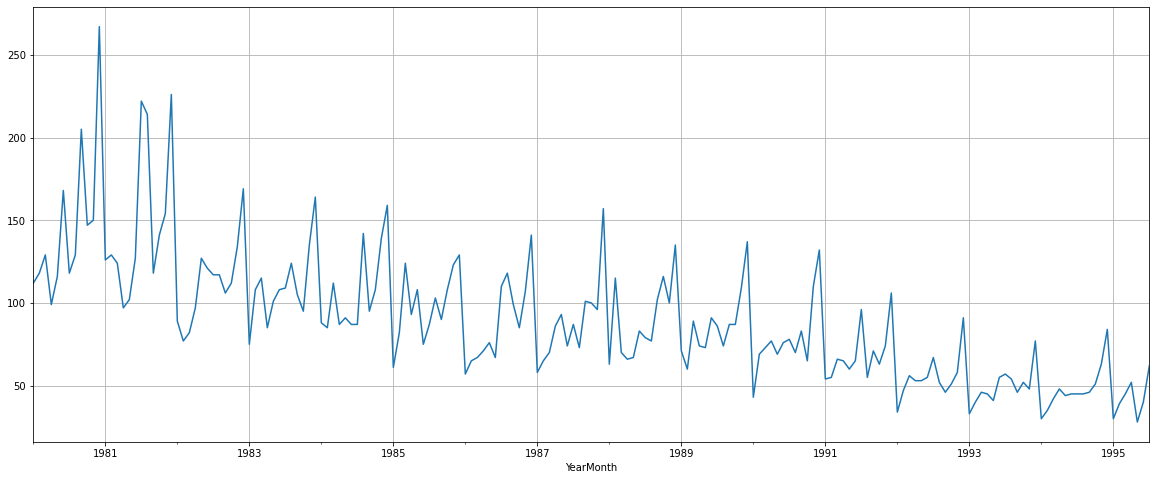

In [1006]:
df_2s.plot(figsize=(20,8))
plt.grid();
plt.savefig("3.jpg")

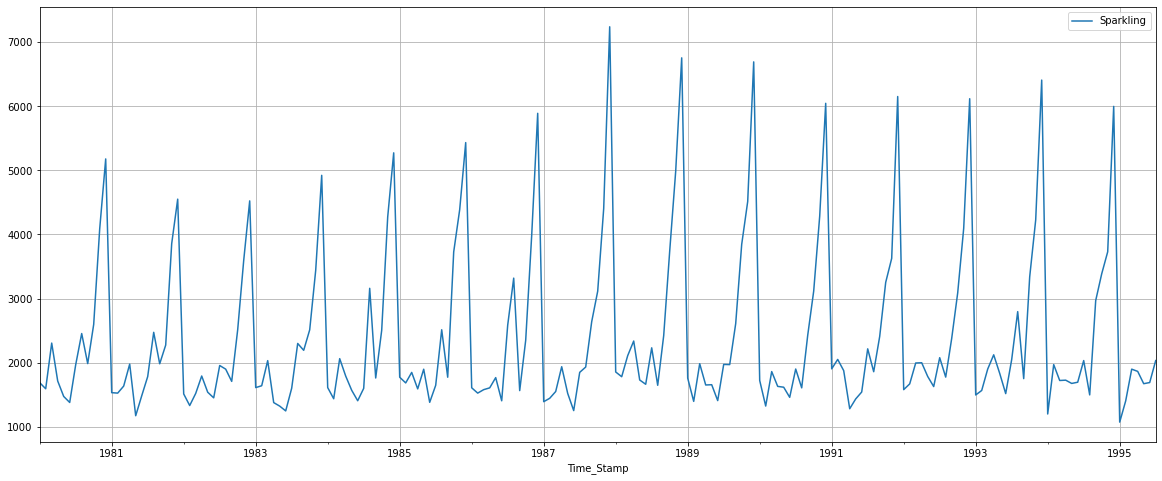

In [1007]:
dfs.plot(figsize=(20,8))
plt.grid();
plt.savefig("4.jpg")

##### there seems to be some kind of trend and seasonality in the sparkling wine company

# Descriptive

In [1008]:
dfr.describe()

Rose
count  187.000000
mean    89.909091
std     39.244440
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [1009]:
dfr.isnull().value_counts()


Rose 
False    187
dtype: int64

In [1010]:
dfs.isnull().value_counts()


Sparkling
False        187
dtype: int64

In [1011]:
round(dfs.describe(),2)

Sparkling
count     187.00
mean     2402.42
std      1295.11
min      1070.00
25%      1605.00
50%      1874.00
75%      2549.00
max      7242.00

In [1012]:
dfr.isnull().value_counts()

Rose 
False    187
dtype: int64

In [1013]:
dfs.isnull().value_counts()

Sparkling
False        187
dtype: int64

## boxplots

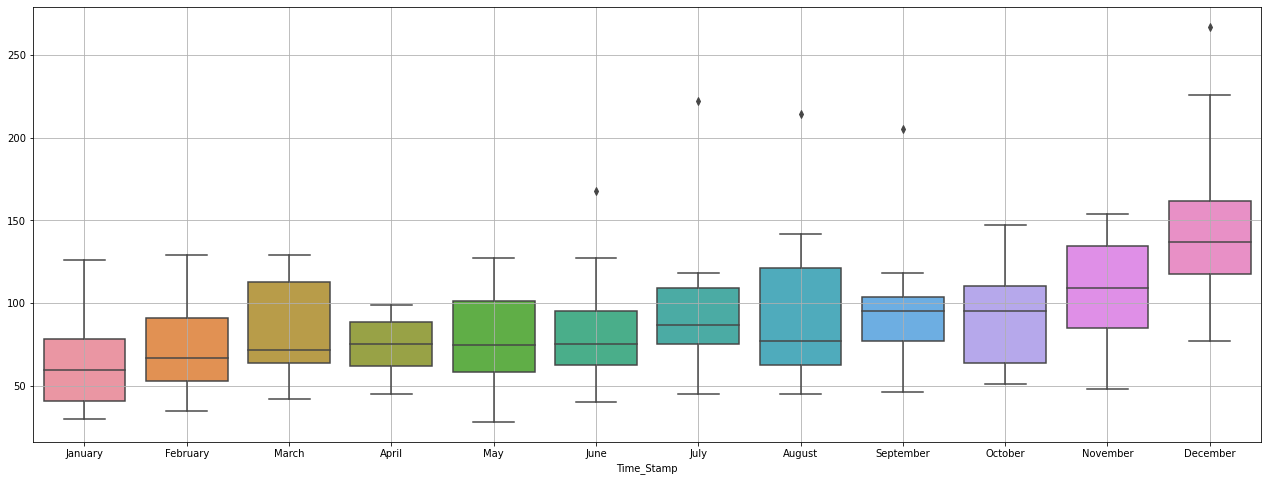

In [1014]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfr.index.month_name(),y = dfr.values[:,0],ax=ax)
plt.grid();
plt.savefig("5.jpg")

the monthly data  

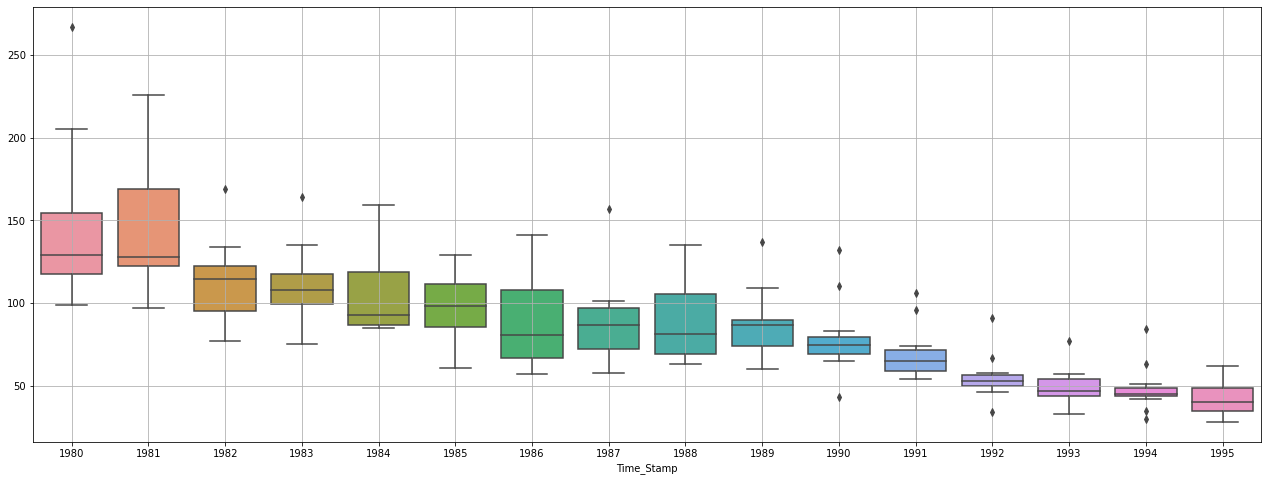

In [1015]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfr.index.year,y = dfr.values[:,0],ax=ax)
plt.grid();
plt.savefig("6.jpg")

the yearly data

###### box plot for the rose wine 

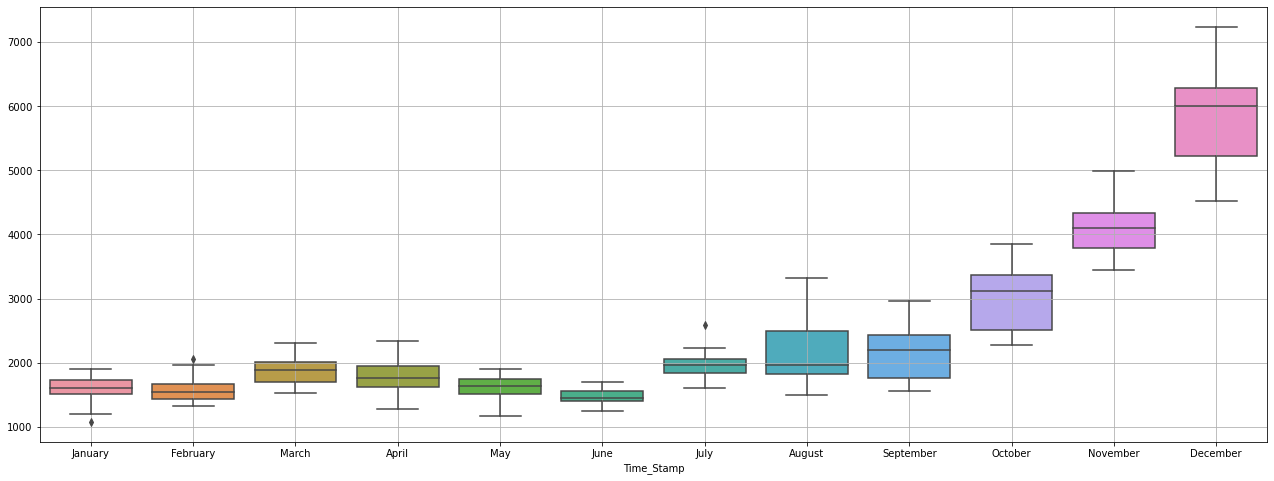

In [1016]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfs.index.month_name(),y = dfs.values[:,0],ax=ax)
plt.grid();
plt.savefig("7.jpg")

monthly data

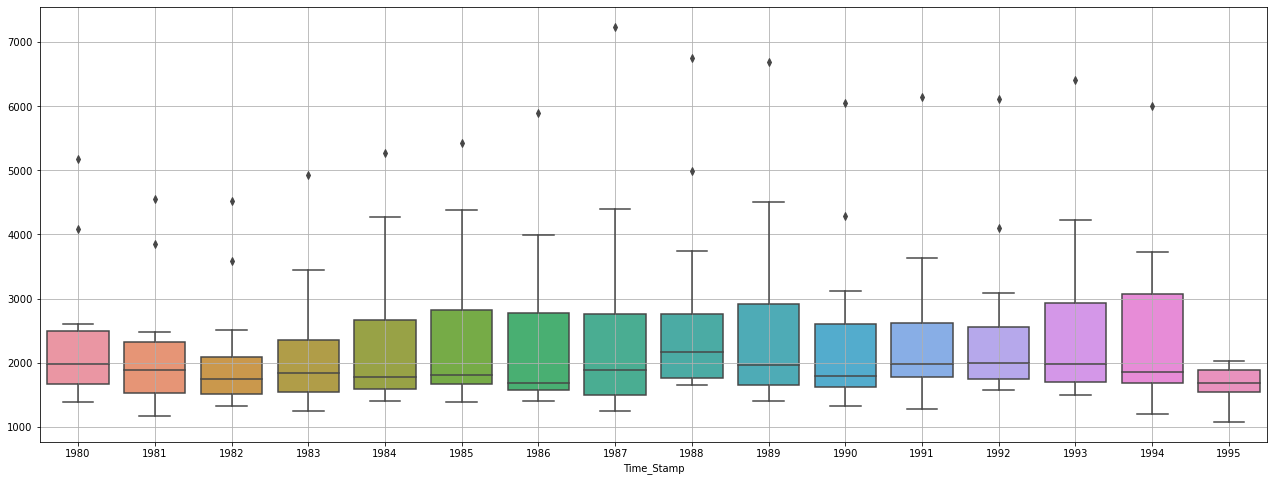

In [1017]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = dfs.index.year,y = dfs.values[:,0],ax=ax)
plt.grid();
plt.savefig("8.jpg")

yearly data

###### box plot for the sparkling wine

## plot a graph monthly across yearly

In [1018]:
rmonthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month_name(), index = dfr.index.year)
rmonthly_sales_across_years

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
1980         99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981         97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982         97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983         85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984         87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985         93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986         71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987         86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988         66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989         74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990         77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991         65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992         53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993         45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994         48.0    45.0      84.0      35.0     30.0   45.0   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

In [1019]:
smonthly_sales_across_years = pd.pivot_table(dfs, values = 'Sparkling', columns = dfs.index.month_name(), index = dfs.index.year)
smonthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

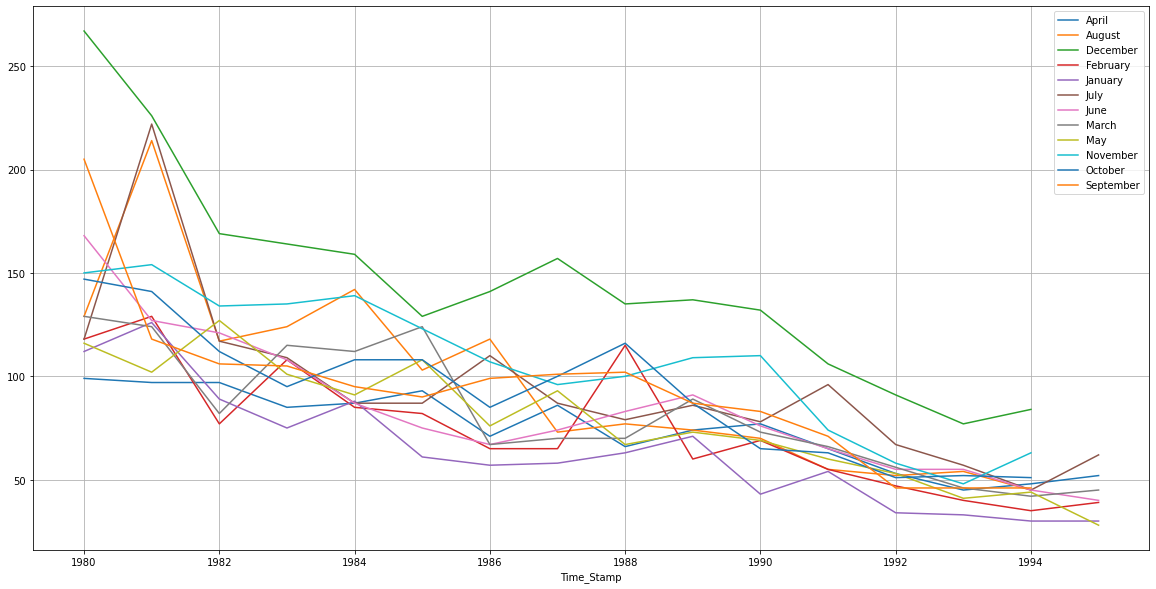

In [1020]:
rmonthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.savefig("9.jpg")

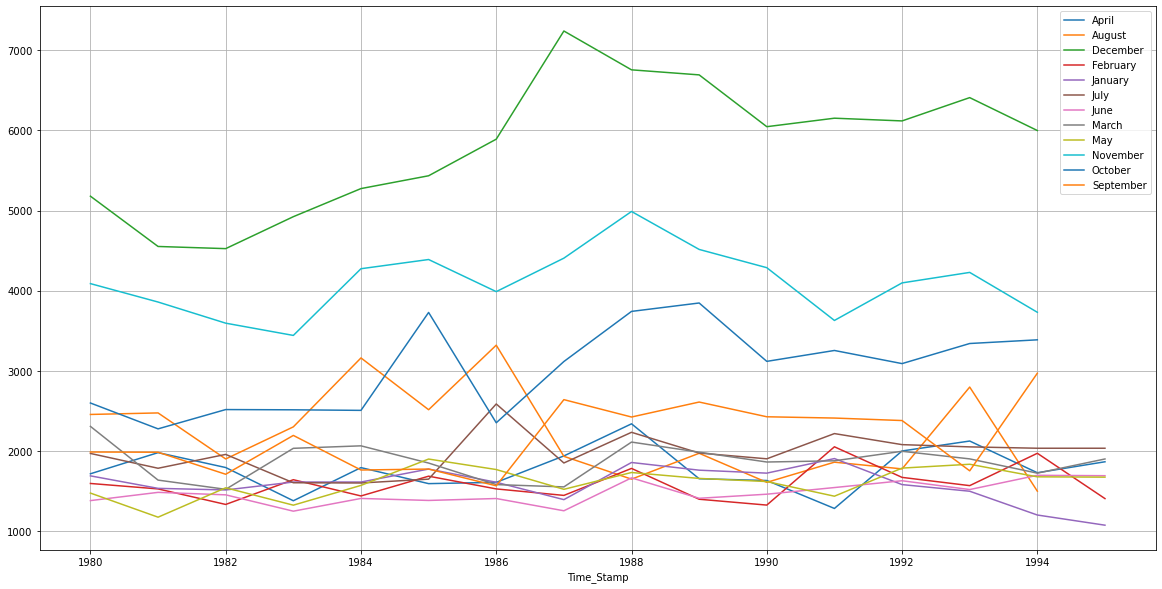

In [1021]:
smonthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.savefig("10.jpg")

It looks like for both rose and sparkling wine the growth rate is high 

## decompose

In [1022]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

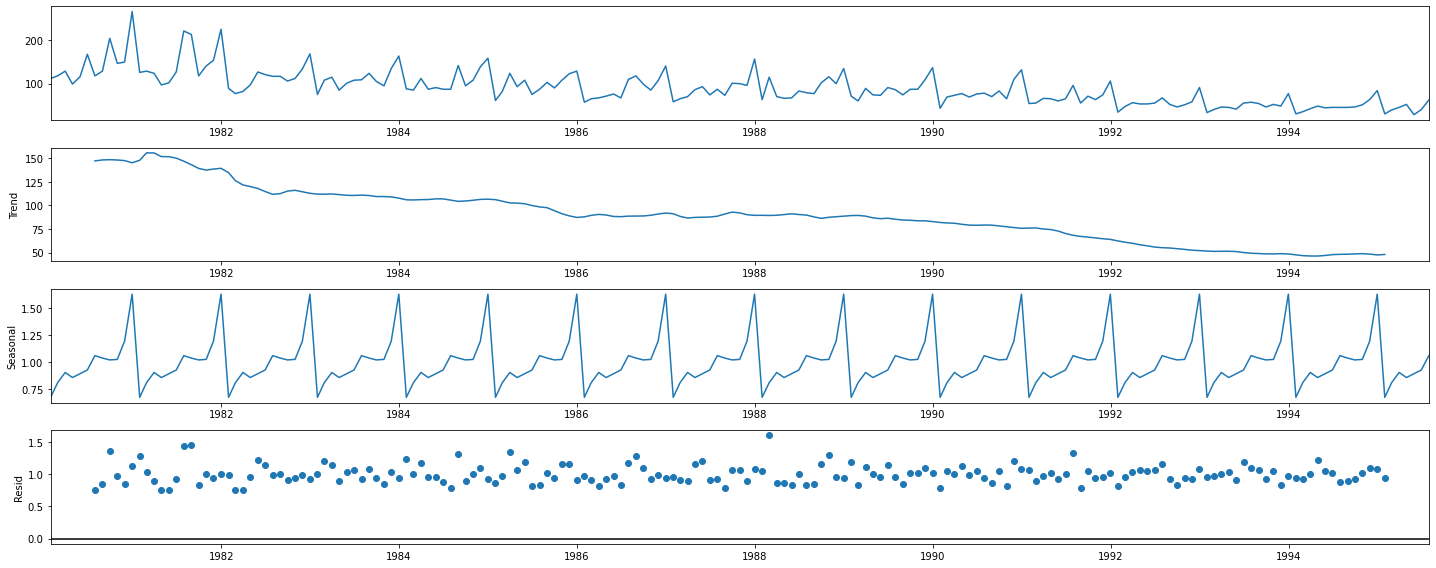

In [1023]:
rdecomposition = seasonal_decompose(dfr,model='multiplicative')
rdecomposition.plot();
plt.savefig("11.jpg")

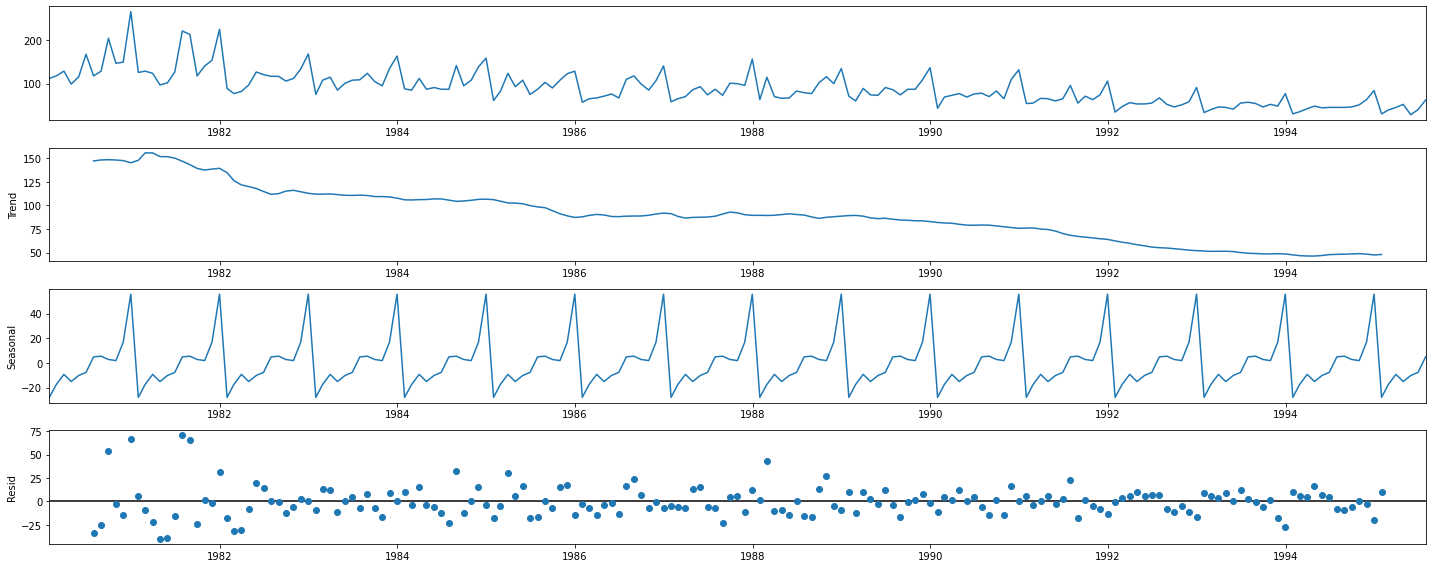

In [1024]:
rdecomposition = seasonal_decompose(dfr,model='additive')
rdecomposition.plot();
plt.savefig("13.jpg")

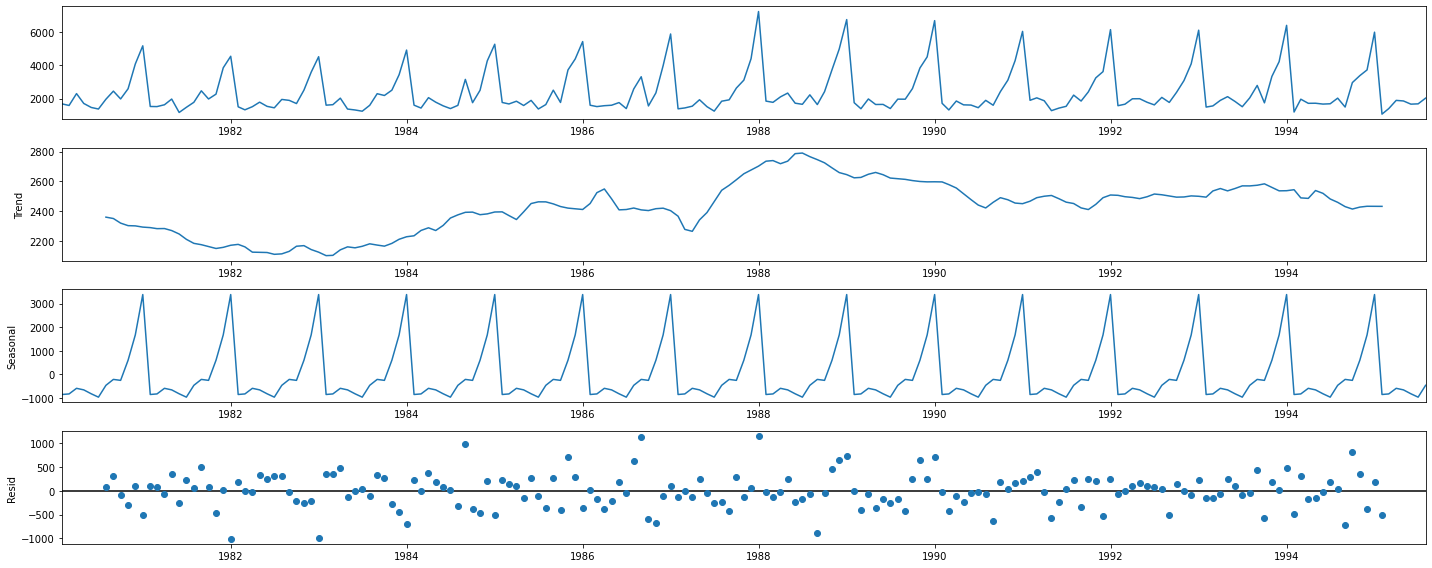

In [1025]:
rdecomposition = seasonal_decompose(dfs,model='additive')
rdecomposition.plot();
plt.savefig("14.jpg")

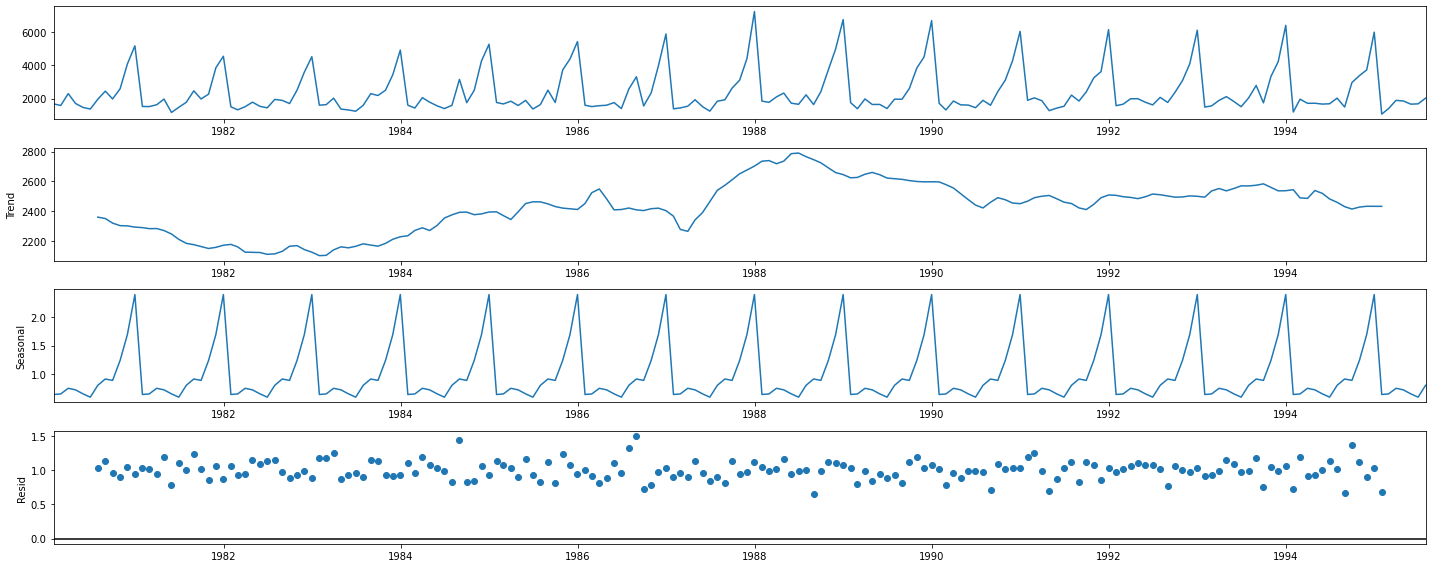

In [1026]:
sdecomposition = seasonal_decompose(dfs,model='multiplicative')
sdecomposition.plot();
plt.savefig("12.jpg")

In [1027]:
trend = sdecomposition.trend
seasonality = sdecomposition.seasonal
residual = sdecomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [1028]:
trend = rdecomposition.trend
seasonality = rdecomposition.seasonal
residual = rdecomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [1029]:
df_1r['Time_Stamp'] = pd.to_datetime(df_1r['Time_Stamp'])
dfr_final_model = df_1r.set_index('Time_Stamp')
#df_final_model.drop(['Date'], axis=1, inplace=True)
dfr_final_model

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0
...              ...    ...
1995-03-31   1995-03   45.0
1995-04-30   1995-04   52.0
1995-05-31   1995-05   28.0
1995-06-30   1995-06   40.0
1995-07-31   1995-07   62.0

[187 rows x 2 columns]

In [1030]:
df_1s['Time_Stamp'] = pd.to_datetime(df_1s['Time_Stamp'])
dfs_final_model = df_1s.set_index('Time_Stamp')
#df_final_model.drop(['Date'], axis=1, inplace=True)
dfs_final_model

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471
...              ...        ...
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

[187 rows x 2 columns]

In [1031]:
rtrain= dfr_final_model[pd.to_datetime(dfr_final_model['YearMonth']) < pd.to_datetime('1991-01-31')]
rtrain.shape

(133, 2)

In [1032]:
rtest= dfr_final_model[pd.to_datetime(dfr_final_model['YearMonth']) >= pd.to_datetime('1991-01-31')]
rtest.shape

(54, 2)

In [1033]:
strain= dfs_final_model[pd.to_datetime(dfs_final_model['YearMonth']) < pd.to_datetime('1991-01-31')]
strain.shape

(133, 2)

In [1034]:
stest= dfs_final_model[pd.to_datetime(dfs_final_model['YearMonth']) >= pd.to_datetime('1991-01-31')]
stest.shape

(54, 2)

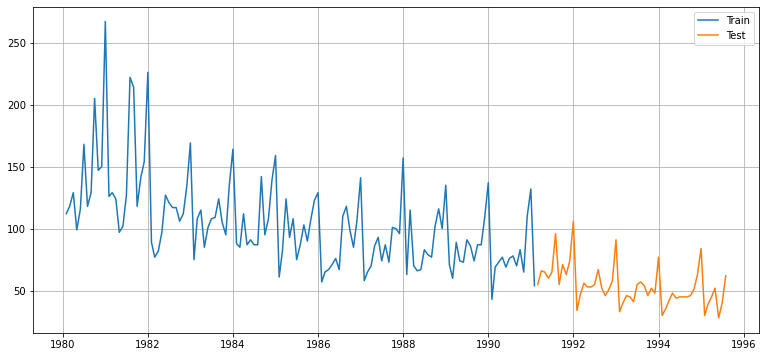

In [1035]:
plt.figure(figsize=(13,6))
plt.plot( rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.legend(loc='best')
plt.grid();
plt.savefig("15.jpg")

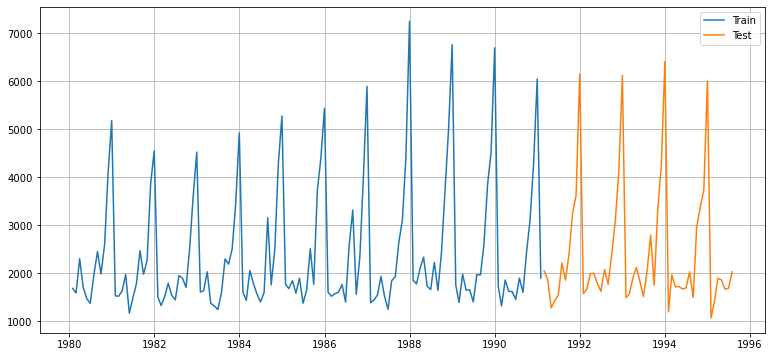

In [1036]:
plt.figure(figsize=(13,6))
plt.plot( strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.legend(loc='best')
plt.grid();
plt.savefig("16.jpg")

# Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression

In [1037]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+43 for i in range(len(rtest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [1038]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+43 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [1039]:
rLinearRegression_train = rtrain.copy()
rLinearRegression_test = rtest.copy()

In [1040]:
sLinearRegression_train = strain.copy()
sLinearRegression_test = stest.copy()

In [1041]:
rLinearRegression_train['time'] = train_time
rLinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',rLinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',rLinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',rLinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',rLinearRegression_test.tail(),'\n')

First few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1980-01-31   1980-01  112.0     1
1980-02-29   1980-02  118.0     2
1980-03-31   1980-03  129.0     3
1980-04-30   1980-04   99.0     4
1980-05-31   1980-05  116.0     5 

Last few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1990-09-30   1990-09   83.0   129
1990-10-31   1990-10   65.0   130
1990-11-30   1990-11  110.0   131
1990-12-31   1990-12  132.0   132
1991-01-31   1991-01   54.0   133 

First few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1991-02-28   1991-02  55.0    43
1991-03-31   1991-03  66.0    44
1991-04-30   1991-04  65.0    45
1991-05-31   1991-05  60.0    46
1991-06-30   1991-06  65.0    47 

Last few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1995-03-31   1995-03  45.0    92
1995-04-30   1995-04  52.0    93
1995-05-31   1995-05  28.0   

In [1042]:
sLinearRegression_train['time'] = train_time
sLinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',sLinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',sLinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',sLinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',sLinearRegression_test.tail(),'\n')

First few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1980-01-31   1980-01       1686     1
1980-02-29   1980-02       1591     2
1980-03-31   1980-03       2304     3
1980-04-30   1980-04       1712     4
1980-05-31   1980-05       1471     5 

Last few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1990-09-30   1990-09       2424   129
1990-10-31   1990-10       3116   130
1990-11-30   1990-11       4286   131
1990-12-31   1990-12       6047   132
1991-01-31   1991-01       1902   133 

First few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1991-02-28   1991-02       2049    43
1991-03-31   1991-03       1874    44
1991-04-30   1991-04       1279    45
1991-05-31   1991-05       1432    46
1991-06-30   1991-06       1540    47 

Last few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                      

In [1043]:
from sklearn.linear_model import LinearRegression

In [1044]:
rlr = LinearRegression()
slr = LinearRegression()

In [1045]:
rlr.fit(rLinearRegression_train[['time']],rLinearRegression_train['Rose'].values)
slr.fit(sLinearRegression_train[['time']],sLinearRegression_train['Sparkling'].values)

LinearRegression()

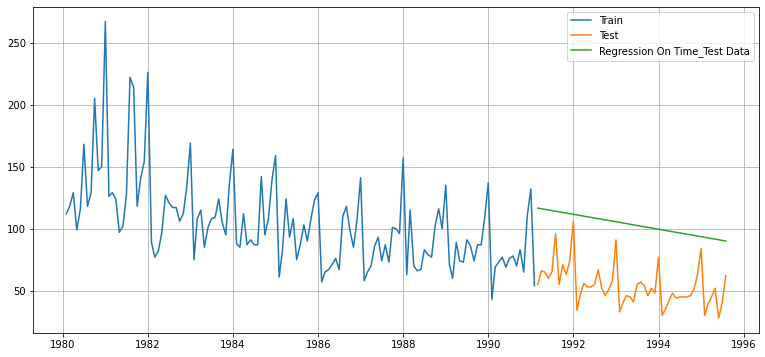

In [1046]:
rtest_predictions_model1         = rlr.predict(rLinearRegression_test[['time']])
rLinearRegression_test['RegOnTime'] = rtest_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(rLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();
plt.savefig("17.jpg")

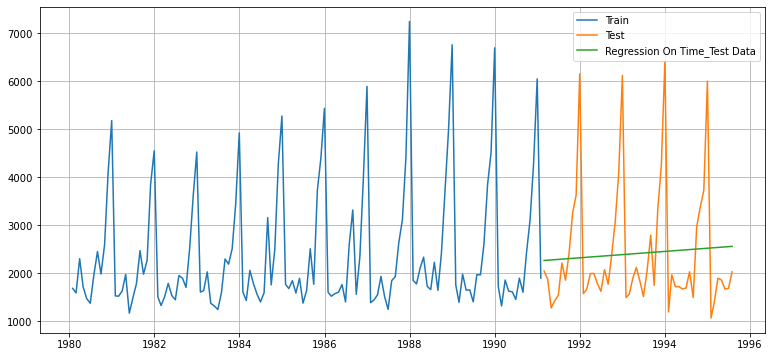

In [1047]:
stest_predictions_model1         = slr.predict(sLinearRegression_test[['time']])
sLinearRegression_test['RegOnTime'] = stest_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(sLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();
plt.savefig("18.jpg")

In [1048]:
from sklearn import metrics

In [1049]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(rtest['Rose'],rtest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.554


In [1050]:
resultsDf = pd.DataFrame({'Rose Test RMSE': [rmse_model1_test]},index=['Rose RegressionOnTime'])
resultsDf

Rose Test RMSE
Rose RegressionOnTime       51.554113

In [1051]:
## Test Data - RMSE

srmse_model1_test = metrics.mean_squared_error(stest['Sparkling'],stest_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(srmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1286.310


In [1052]:
sresultsDf = pd.DataFrame({'Sparkling Test RMSE': [srmse_model1_test]},index=['Sparkling RegressionOnTime'])
resultsDf = pd.concat([resultsDf, sresultsDf])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime            51.554113                  NaN
Sparkling RegressionOnTime             NaN           1286.31005

## naive approach

In [1053]:
rNaiveModel_train = rtrain.copy()
rNaiveModel_test = rtest.copy()

In [1054]:
sNaiveModel_train = strain.copy()
sNaiveModel_test = stest.copy()

In [1055]:
rNaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
rNaiveModel_test['naive'].head()

Time_Stamp
1991-02-28    54.0
1991-03-31    54.0
1991-04-30    54.0
1991-05-31    54.0
1991-06-30    54.0
Name: naive, dtype: float64

In [1056]:
sNaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
sNaiveModel_test['naive'].head()

Time_Stamp
1991-02-28    1902
1991-03-31    1902
1991-04-30    1902
1991-05-31    1902
1991-06-30    1902
Name: naive, dtype: int64

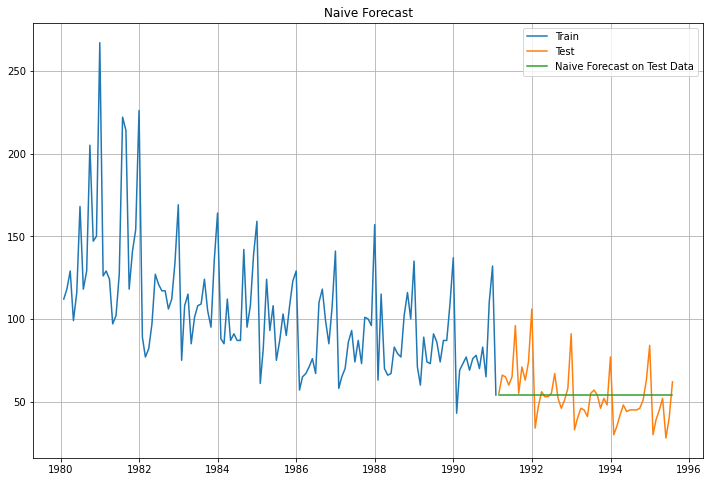

In [1057]:
plt.figure(figsize=(12,8))
plt.plot(rNaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(rNaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.savefig("19.jpg")

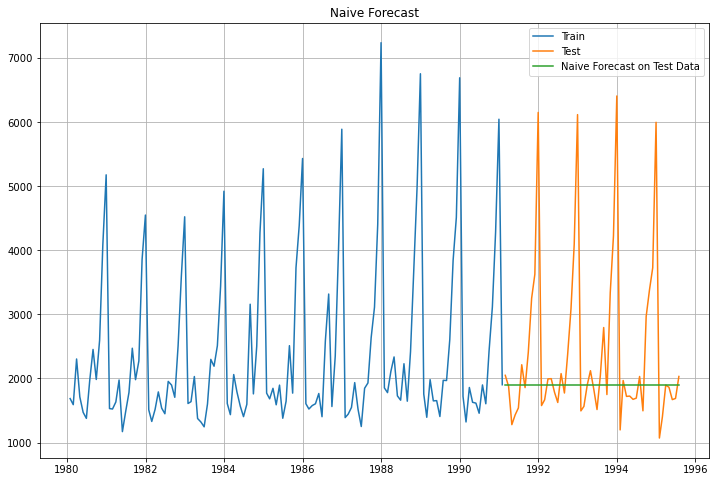

In [1058]:
plt.figure(figsize=(12,8))
plt.plot(sNaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(sNaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.savefig("20.jpg")

In [1059]:
## Test Data - RMSE

rrmse_model2_test = metrics.mean_squared_error(rtest['Rose'],rNaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.916


In [1060]:
rresultsDf_2 = pd.DataFrame({'Rose Test RMSE': [rrmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf,rresultsDf_2])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime            51.554113                  NaN
Sparkling RegressionOnTime             NaN           1286.31005
NaiveModel                       15.915867                  NaN

In [1061]:
## Test Data - RMSE

srmse_model2_test = metrics.mean_squared_error(stest['Sparkling'],sNaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(srmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1381.177


In [1062]:
sresultsDf_2 = pd.DataFrame({'Sparkling Test RMSE': [srmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf,sresultsDf_2])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime            51.554113                  NaN
Sparkling RegressionOnTime             NaN          1286.310050
NaiveModel                       15.915867                  NaN
NaiveModel                             NaN          1381.177135

## simple average

In [1063]:
sSimpleAverage_train = strain.copy()
sSimpleAverage_test = stest.copy()

In [1064]:
rSimpleAverage_train = rtrain.copy()
rSimpleAverage_test = rtest.copy()

In [1065]:
sSimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
sSimpleAverage_test.head()

YearMonth  Sparkling  mean_forecast
Time_Stamp                                    
1991-02-28   1991-02       2049    2400.007519
1991-03-31   1991-03       1874    2400.007519
1991-04-30   1991-04       1279    2400.007519
1991-05-31   1991-05       1432    2400.007519
1991-06-30   1991-06       1540    2400.007519

In [1066]:
rSimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
rSimpleAverage_test.head()

YearMonth  Rose  mean_forecast
Time_Stamp                               
1991-02-28   1991-02  55.0     104.556391
1991-03-31   1991-03  66.0     104.556391
1991-04-30   1991-04  65.0     104.556391
1991-05-31   1991-05  60.0     104.556391
1991-06-30   1991-06  65.0     104.556391

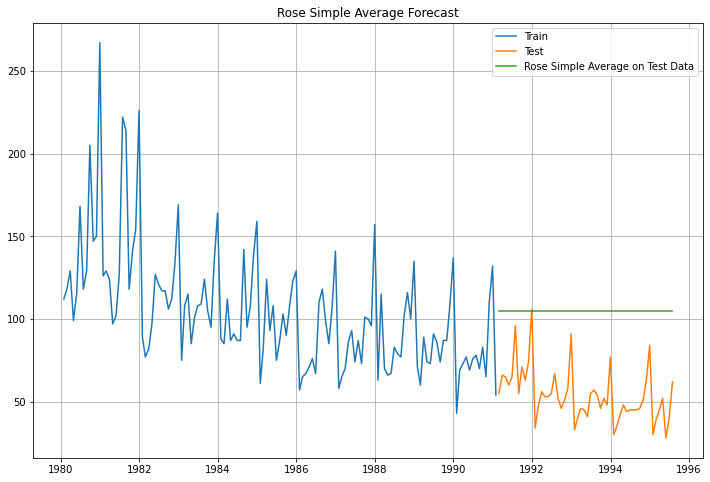

In [1067]:
plt.figure(figsize=(12,8))
plt.plot(rSimpleAverage_train['Rose'], label='Train')
plt.plot(rSimpleAverage_test['Rose'], label='Test')
plt.plot(rSimpleAverage_test['mean_forecast'], label='Rose Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Rose Simple Average Forecast")
plt.grid();
plt.savefig("21.jpg")

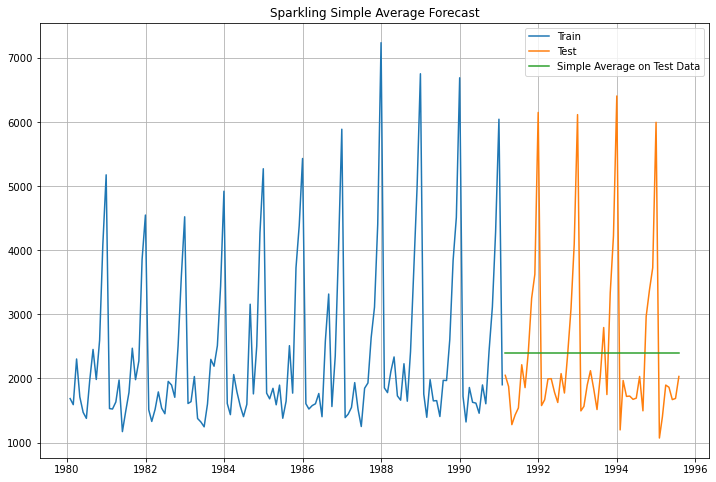

In [1068]:
plt.figure(figsize=(12,8))
plt.plot(sSimpleAverage_train['Sparkling'], label='Train')
plt.plot(sSimpleAverage_test['Sparkling'], label='Test')
plt.plot(sSimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Sparkling Simple Average Forecast")
plt.grid();
plt.savefig("22.jpg")

In [1069]:
## Test Data - RMSE 

rrmse_model3_test = metrics.mean_squared_error(rtest['Rose'],sSimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Rose Test Data,  RMSE is %3.3f" %(rrmse_model3_test))

For Simple Average forecast on the Rose Test Data,  RMSE is 2346.228


In [1070]:
rresultsDf_3 = pd.DataFrame({'Rose Test RMSE': [rrmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, rresultsDf_3])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime            51.554113                  NaN
Sparkling RegressionOnTime             NaN          1286.310050
NaiveModel                       15.915867                  NaN
NaiveModel                             NaN          1381.177135
SimpleAverageModel             2346.228164                  NaN

In [1071]:
## Test Data - RMSE 

srmse_model3_test = metrics.mean_squared_error(stest['Sparkling'],sSimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Sparkling Test Data,  RMSE is %3.3f" %(srmse_model3_test))

For Simple Average forecast on the Sparkling Test Data,  RMSE is 1285.040


In [1072]:
sresultsDf_3 = pd.DataFrame({'Sparkling Test RMSE': [srmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, sresultsDf_3])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime            51.554113                  NaN
Sparkling RegressionOnTime             NaN          1286.310050
NaiveModel                       15.915867                  NaN
NaiveModel                             NaN          1381.177135
SimpleAverageModel             2346.228164                  NaN
SimpleAverageModel                     NaN          1285.039964

## moving average

In [1073]:
rMovingAverage = dfr.copy()
rMovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [1074]:
sMovingAverage = dfs.copy()
sMovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [1075]:

rMovingAverage['Trailing_2'] = rMovingAverage['Rose'].rolling(2).mean()
rMovingAverage['Trailing_4'] = rMovingAverage['Rose'].rolling(4).mean()
rMovingAverage['Trailing_6'] = rMovingAverage['Rose'].rolling(6).mean()
rMovingAverage['Trailing_9'] = rMovingAverage['Rose'].rolling(9).mean()

rMovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

In [1076]:

sMovingAverage['Trailing_2'] = sMovingAverage['Sparkling'].rolling(2).mean()
sMovingAverage['Trailing_4'] = sMovingAverage['Sparkling'].rolling(4).mean()
sMovingAverage['Trailing_6'] = sMovingAverage['Sparkling'].rolling(6).mean()
sMovingAverage['Trailing_9'] = sMovingAverage['Sparkling'].rolling(9).mean()

sMovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

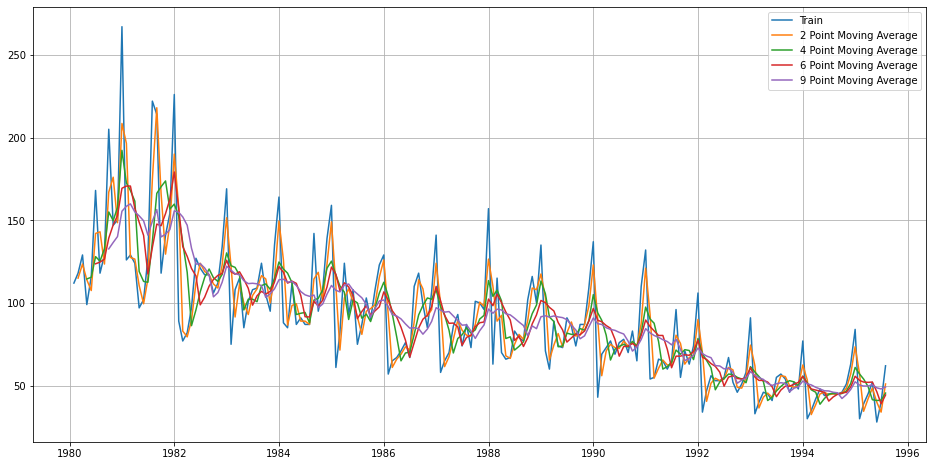

In [1077]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(rMovingAverage['Rose'], label='Train')
plt.plot(rMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(rMovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(rMovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(rMovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.savefig("23.jpg")

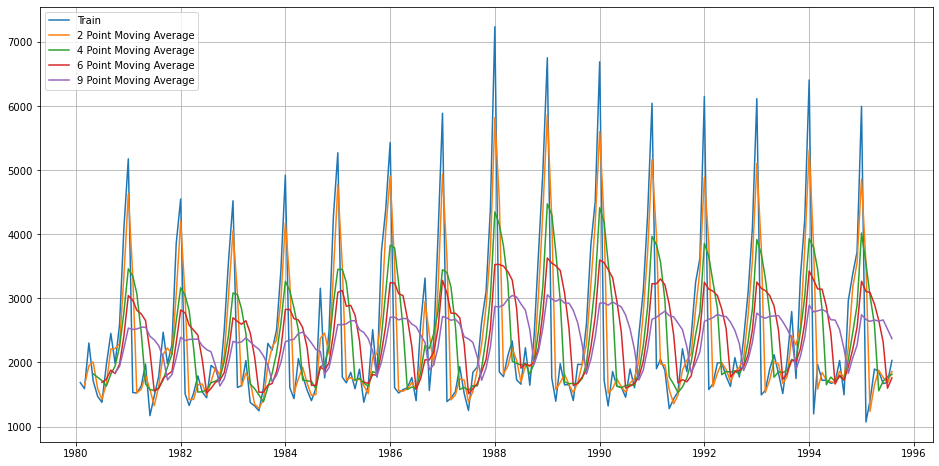

In [1078]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(sMovingAverage['Sparkling'], label='Train')
plt.plot(sMovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(sMovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(sMovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(sMovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.savefig("24.jpg")

train  test split .

In [1079]:
#Creating train and test set 
rtrailing_MovingAverage_train=rMovingAverage[pd.to_datetime(dfr_final_model['YearMonth']) < pd.to_datetime('1991-01-31')] 
rtrailing_MovingAverage_test=rMovingAverage[pd.to_datetime(dfr_final_model['YearMonth']) >= pd.to_datetime('1991-01-31')]

In [1080]:
#Creating train and test set 
strailing_MovingAverage_train=sMovingAverage[pd.to_datetime(dfs_final_model['YearMonth']) < pd.to_datetime('1991-01-31')] 
strailing_MovingAverage_test=sMovingAverage[pd.to_datetime(dfs_final_model['YearMonth']) >= pd.to_datetime('1991-01-31')]

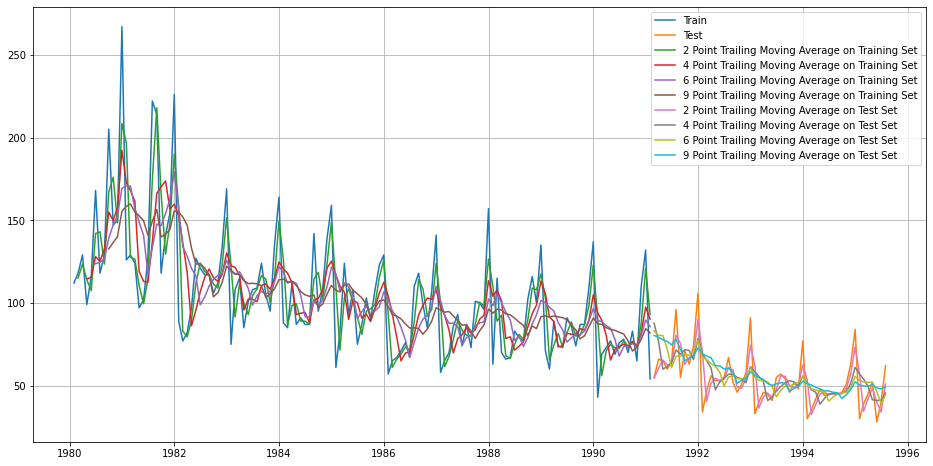

In [1081]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(rtrailing_MovingAverage_train['Rose'], label='Train')
plt.plot(rtrailing_MovingAverage_test['Rose'], label='Test')

plt.plot(rtrailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(rtrailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(rtrailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(rtrailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(rtrailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(rtrailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
plt.savefig("25.jpg")

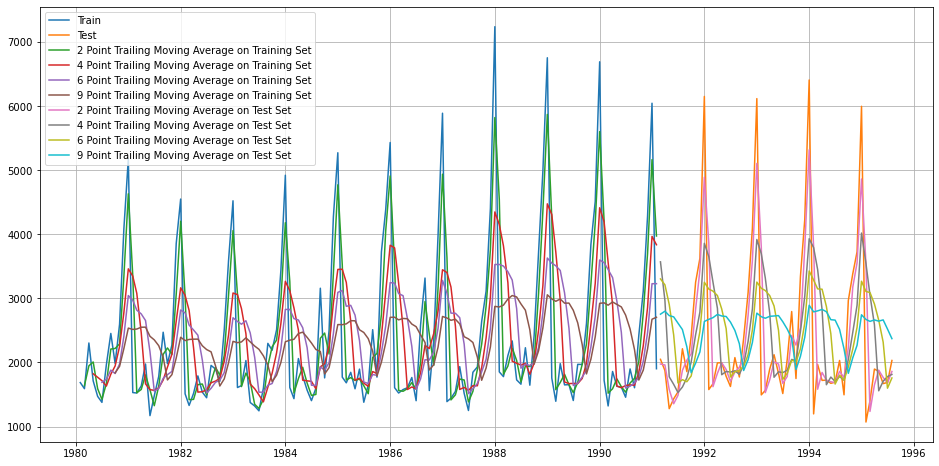

In [1082]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(strailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(strailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(strailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(strailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(strailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(strailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(strailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(strailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
plt.savefig("26.jpg")

In [1083]:
## Test Data - RMSE --> 2 point Trailing MA

rrmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rrmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rrmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rrmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rrmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],rtrailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rrmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 10.355
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.729
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.061
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.374 


In [1084]:
## Test Data - RMSE --> 2 point Trailing MA

srmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],strailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(srmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

srmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],strailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(srmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

srmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],strailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(srmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

srmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],strailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(srmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1354.278 


## before getting into exponential smoothing lets compare the models

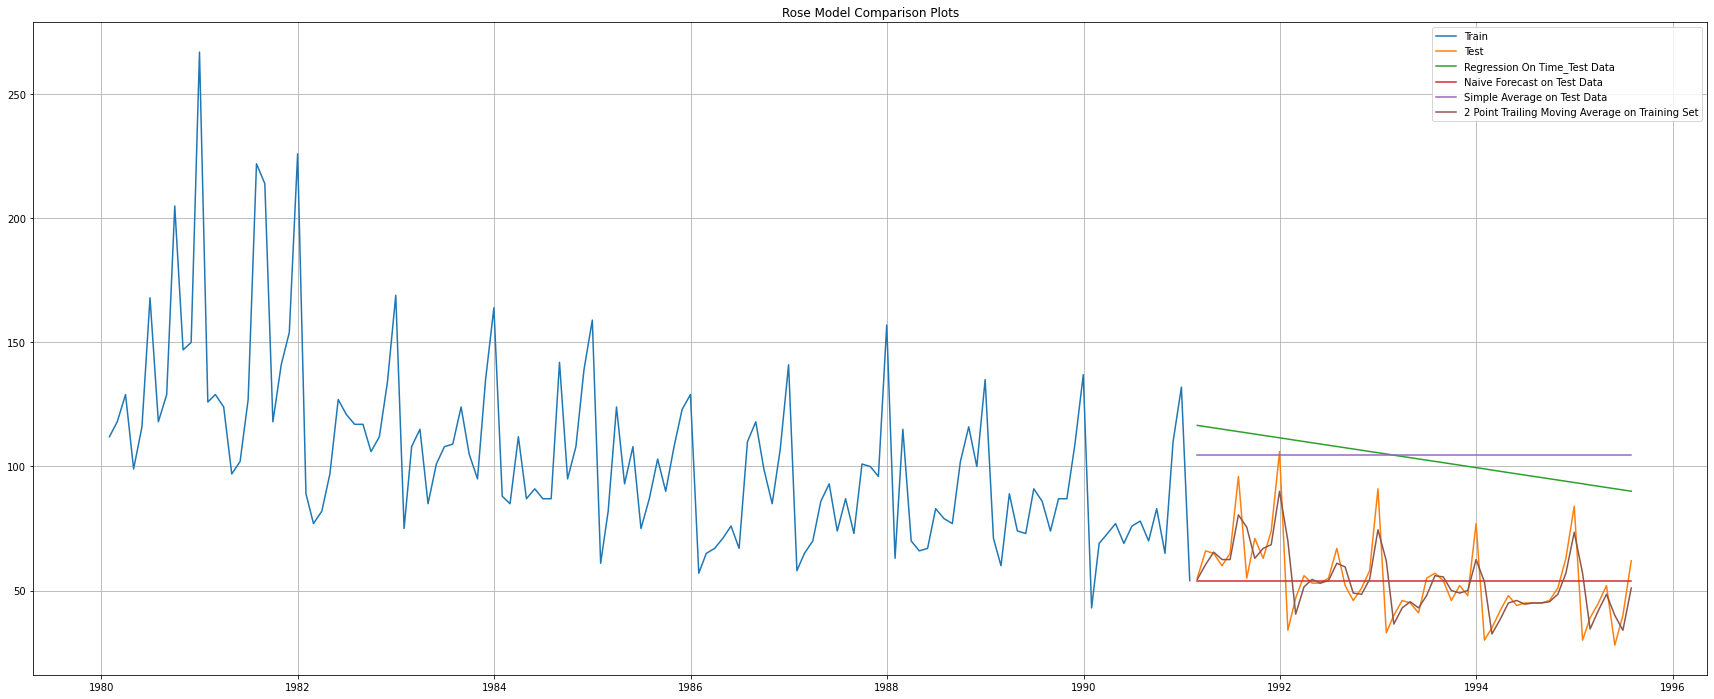

In [1085]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(rLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(rNaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(rSimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(rtrailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Rose Model Comparison Plots")
plt.grid();
plt.savefig("comp.jpg")

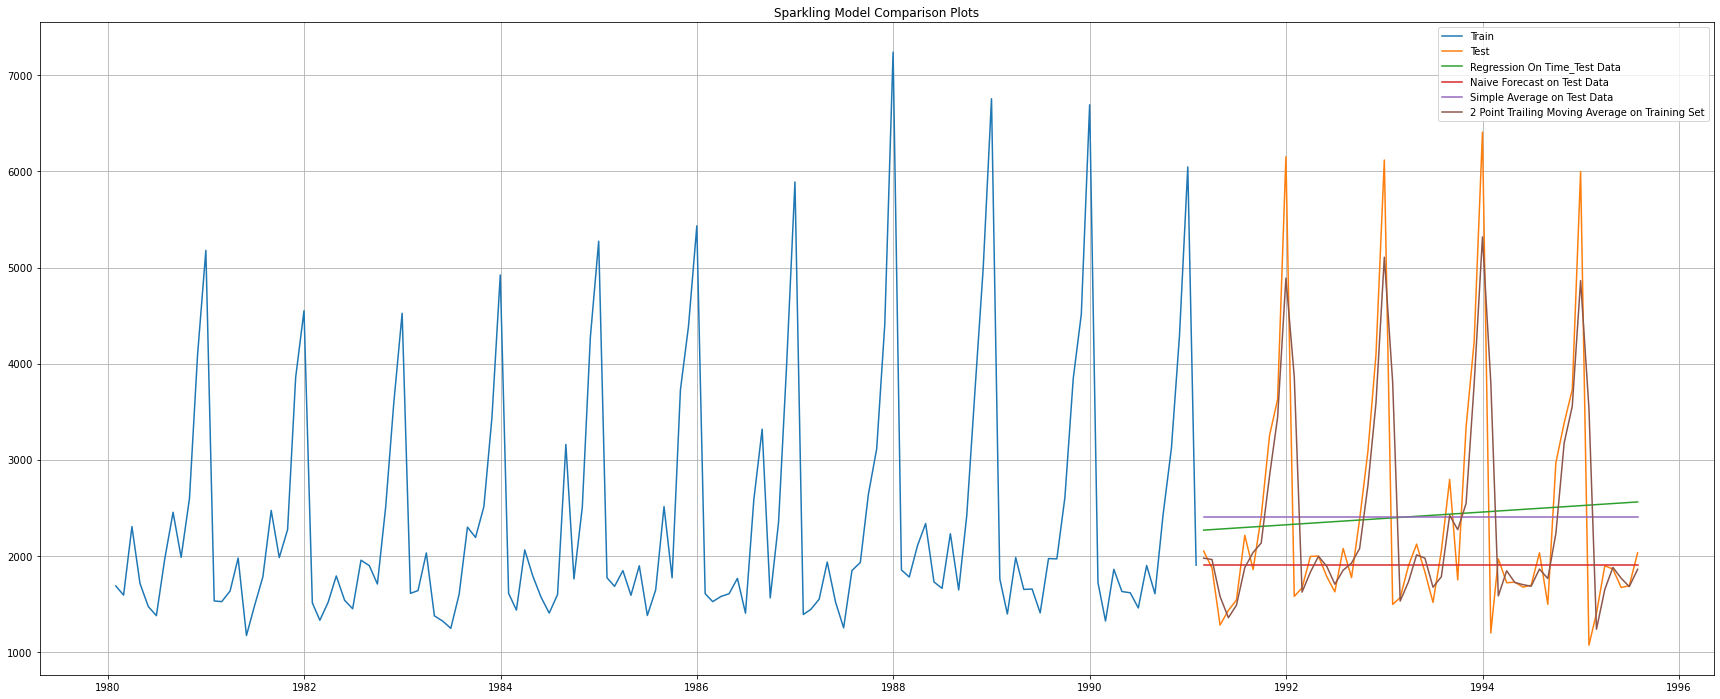

In [1086]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(sLinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(sNaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(sSimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(strailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Sparkling Model Comparison Plots")
plt.grid();
plt.savefig("comps.jpg")

## simple exponential smoothing

In [1087]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [1088]:
rSES_train = rtrain.copy()
rSES_test = rtest.copy()

In [1089]:
sSES_train = strain.copy()
sSES_test = stest.copy()

In [1090]:
rmodel_SES = SimpleExpSmoothing(rSES_train['Rose'])
smodel_SES = SimpleExpSmoothing(sSES_train['Sparkling'])

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [1091]:
rmodel_SES_autofit = rmodel_SES.fit(optimized=True)
smodel_SES_autofit = smodel_SES.fit(optimized=True)

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [1092]:
rmodel_SES_autofit.params
smodel_SES_autofit.params

{'smoothing_level': 0.05557561614211843,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2193.2548066238814,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1093]:
rSES_test['predict'] = rmodel_SES_autofit.forecast(steps=len(rtest))
rSES_test.head()

YearMonth  Rose    predict
Time_Stamp                           
1991-02-28   1991-02  55.0  83.845233
1991-03-31   1991-03  66.0  83.845233
1991-04-30   1991-04  65.0  83.845233
1991-05-31   1991-05  60.0  83.845233
1991-06-30   1991-06  65.0  83.845233

In [1094]:
sSES_test['predict'] = smodel_SES_autofit.forecast(steps=len(stest))
sSES_test.head()

YearMonth  Sparkling      predict
Time_Stamp                                  
1991-02-28   1991-02       2049  2702.444793
1991-03-31   1991-03       1874  2702.444793
1991-04-30   1991-04       1279  2702.444793
1991-05-31   1991-05       1432  2702.444793
1991-06-30   1991-06       1540  2702.444793

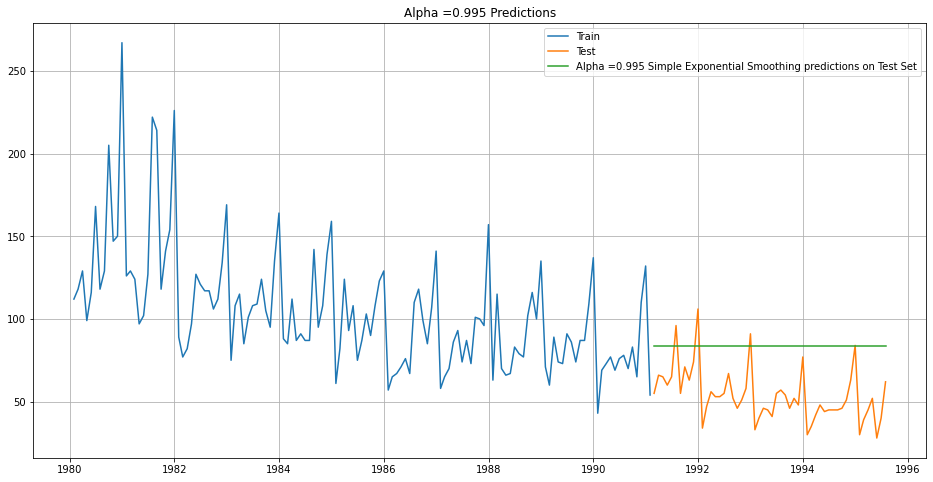

In [1095]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(rSES_train['Rose'], label='Train')
plt.plot(rSES_test['Rose'], label='Test')

plt.plot(rSES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');
plt.savefig("27.jpg")

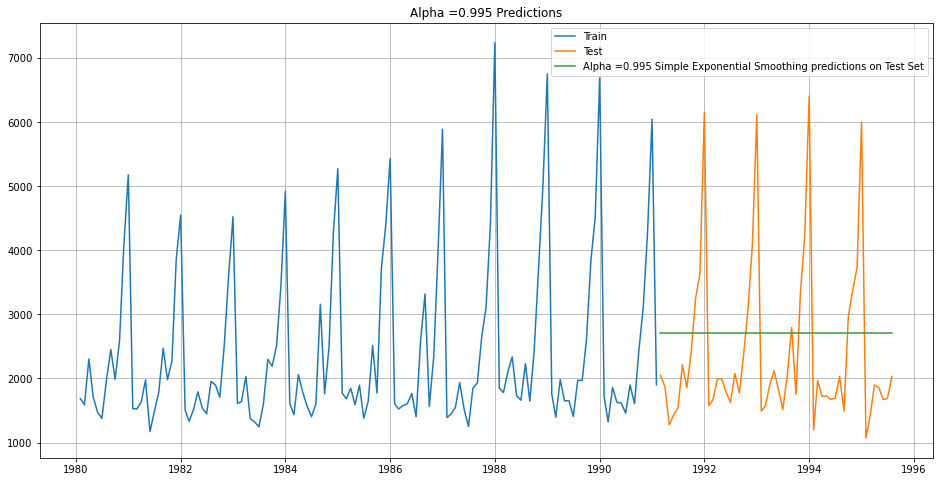

In [1096]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(sSES_train['Sparkling'], label='Train')
plt.plot(sSES_test['Sparkling'], label='Test')

plt.plot(sSES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');
plt.savefig("28.jpg")

In [1097]:
## Test Data

rrmse_model5_test_1 = metrics.mean_squared_error(rSES_test['Rose'],rSES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rrmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 33.971


In [1098]:
rresultsDf_5 = pd.DataFrame({'Rose Test RMSE': [rrmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, rresultsDf_5])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime                        51.554113                  NaN
Sparkling RegressionOnTime                         NaN          1286.310050
NaiveModel                                   15.915867                  NaN
NaiveModel                                         NaN          1381.177135
SimpleAverageModel                         2346.228164                  NaN
SimpleAverageModel                                 NaN          1285.039964
Alpha=0.995,SimpleExponentialSmoothing       33.970592                  NaN

In [1099]:
## Test Data

srmse_model5_test_1 = metrics.mean_squared_error(sSES_test['Sparkling'],rSES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(srmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 2656.048


In [1100]:
sresultsDf_5 = pd.DataFrame({'Sparkling Test RMSE': [srmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, sresultsDf_5])
resultsDf

Rose Test RMSE  Sparkling Test RMSE
Rose RegressionOnTime                        51.554113                  NaN
Sparkling RegressionOnTime                         NaN          1286.310050
NaiveModel                                   15.915867                  NaN
NaiveModel                                         NaN          1381.177135
SimpleAverageModel                         2346.228164                  NaN
SimpleAverageModel                                 NaN          1285.039964
Alpha=0.995,SimpleExponentialSmoothing       33.970592                  NaN
Alpha=0.995,SimpleExponentialSmoothing             NaN          2656.047647

In [1101]:
## First we will define an empty dataframe to store our values from the loop

rresultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
rresultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [1102]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = rmodel_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    rSES_train['predict',i] = model_SES_alpha_i.fittedvalues
    rSES_test['predict',i] = model_SES_alpha_i.forecast(len(rtest['Rose']))
    
    rmse_model5_train_i = metrics.mean_squared_error(rSES_train['Rose'],rSES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(rSES_test['Rose'],rSES_test['predict',i],squared=False)
    
    rresultsDf_6 = rresultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [1103]:
rresultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
6           0.9   37.909145  17.681305
5           0.8   36.731096  21.564816
4           0.7   35.677172  25.945435
3           0.6   34.742038  29.907068
2           0.5   33.922789  32.952881
1           0.4   33.209502  34.778063
0           0.3   32.578932  35.234147

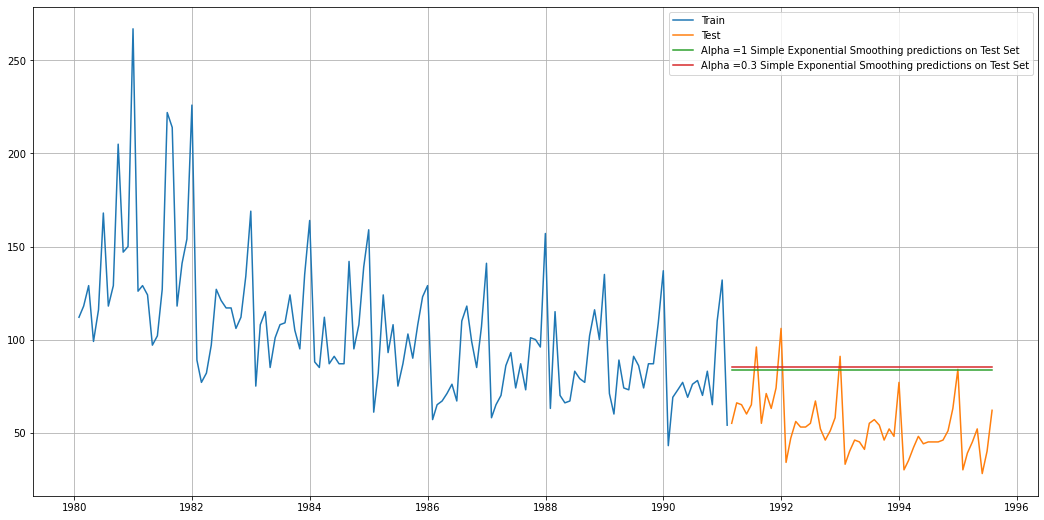

In [1104]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(rSES_train['Rose'], label='Train')
plt.plot(rSES_test['Rose'], label='Test')

plt.plot(rSES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(rSES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

## Double Exponential Smoothing (Holt's Model)


In [1105]:
rDES_train = rtrain.copy()
rDES_test = rtest.copy()
sDES_train = strain.copy()
sDES_test = stest.copy()

In [1106]:
rmodel_DES = Holt(rDES_train['Rose'])
smodel_DES = Holt(sDES_train['Sparkling'])

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [1107]:
model_DES = Holt(sDES_train['Sparkling'])

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [1108]:
resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[],
                            'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        sDES_train['predict_spark',i,j] = model_DES_alpha_i_j.fittedvalues
        sDES_test['predict_spark',i,j] = model_DES_alpha_i_j.forecast(len(stest['Sparkling']))
        
        rmse_spark_model6_train = np.round(metrics.mean_squared_error(sDES_train['Sparkling'],sDES_train['predict_spark',i,j],squared=False),2)
        
        rmse_spark_model6_test = np.round(metrics.mean_squared_error(sDES_test['Sparkling'],sDES_test['predict_spark',i,j],squared=False),2)
       
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,
                                          'Train RMSE':rmse_spark_model6_train ,
                                          'Test RMSE':rmse_spark_model6_test }, 
                                         ignore_index=True)

<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_s

<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_s

<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
<ipython-input-1108-4340ecf6fa75>:5: FutureWarning: the 'smoothing_s

In [1109]:
resultsDf_6.sort_values(by=['Test RMSE']).head(3)

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
70    0.8   0.1     1443.11         NaN    1300.87        NaN
0     0.1   0.1     1360.82         NaN    1548.81        NaN
61    0.7   0.2     1492.81         NaN    1614.67        NaN

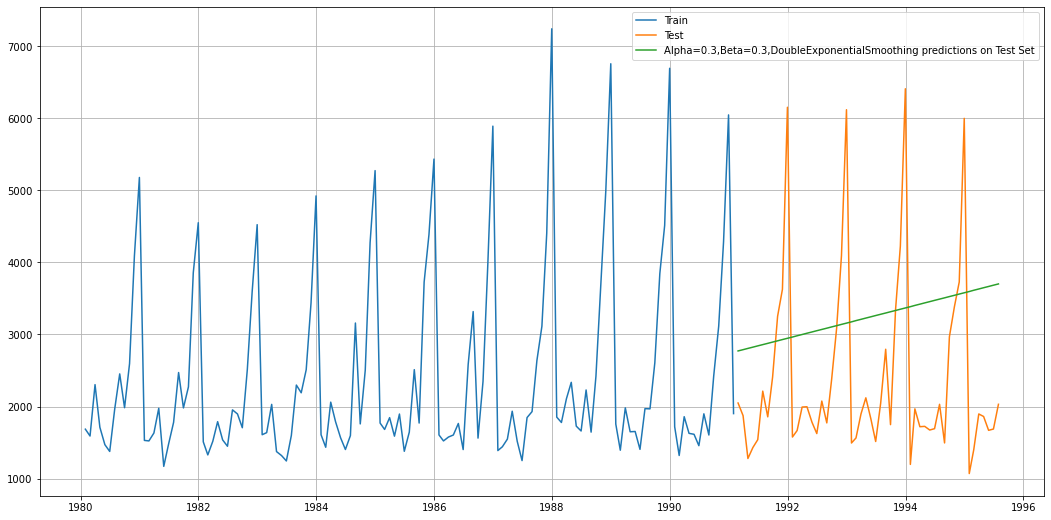

In [1110]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(sDES_train['Sparkling'], label='Train')
plt.plot(sDES_test['Sparkling'], label='Test')

plt.plot(sDES_test['predict_spark', 0.1, 0.1], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.savefig("29.jpg")

In [1111]:
model_DES = Holt(rDES_train['Rose'])

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [1112]:
results_Df_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=True,use_brute=True)
        rDES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        rDES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(rtest['Rose']))
        
        rmse_model6_train = metrics.mean_squared_error(rDES_train['Rose'],rDES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(rDES_test['Rose'],rDES_test['predict',i,j],squared=False)
        
        results_Df_7 = results_Df_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [1113]:
results_Df_7.sort_values(by=['Test RMSE']).head(3)

Alpha Values  Beta Values  Train RMSE  Test RMSE
17           0.5          0.4   38.952694  19.233193
6            0.3          0.9   42.796945  24.664421
11           0.4          0.6   40.304512  25.051338

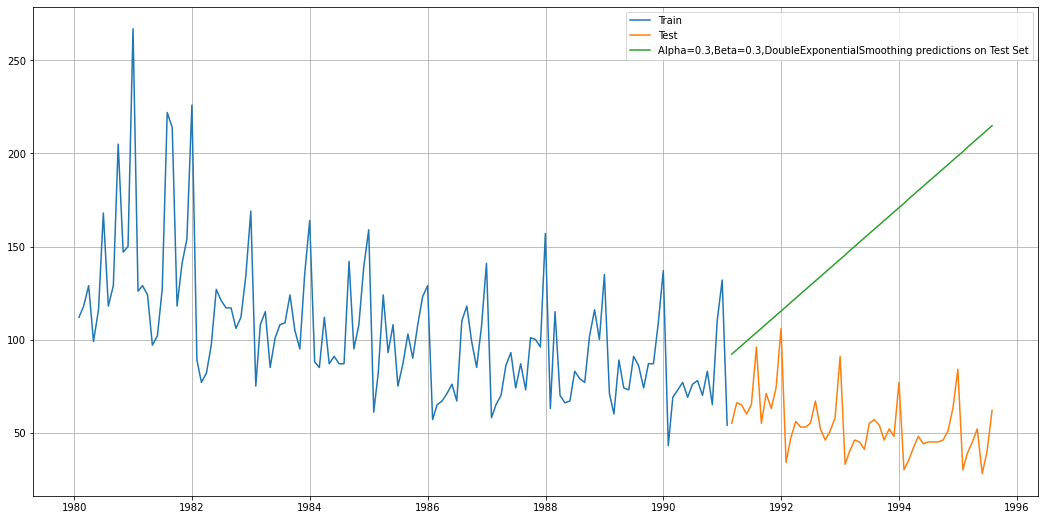

In [1114]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(rDES_train['Rose'], label='Train')
plt.plot(rDES_test['Rose'], label='Test')

plt.plot(rDES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.savefig("30.jpg")

## TRIPLE EXPONENTIAL SMOOTHING

In [1115]:
rTES_train = rtrain.copy()
rTES_test = rtest.copy()

In [1116]:
sTES_train = strain.copy()
sTES_test = stest.copy()

In [1117]:
rmodel_TES = ExponentialSmoothing(rTES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [1118]:
smodel_TES = ExponentialSmoothing(sTES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [1119]:
rmodel_TES_autofit = rmodel_TES.fit()

In [1120]:
smodel_TES_autofit = smodel_TES.fit()

In [1121]:
rmodel_TES_autofit.params

{'smoothing_level': 0.06697821204887282,
 'smoothing_trend': 0.050419897433032664,
 'smoothing_seasonal': 2.707168932015457e-06,
 'damping_trend': nan,
 'initial_level': 69.26725624194682,
 'initial_trend': -0.4262606256483506,
 'initial_seasons': array([1.62331423, 1.84545515, 2.01658513, 1.76307883, 1.98184976,
        2.16014954, 2.37480254, 2.52625807, 2.3948634 , 2.34432624,
        2.73241925, 3.76810233]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1122]:
smodel_TES_autofit.params

{'smoothing_level': 0.0757143760113849,
 'smoothing_trend': 0.07571434682766395,
 'smoothing_seasonal': 0.3765609722135313,
 'damping_trend': nan,
 'initial_level': 1661.8337404985193,
 'initial_trend': -15.116171691893234,
 'initial_seasons': array([1.01633872, 0.95904678, 1.39005932, 1.15135763, 0.89888722,
        0.9089968 , 1.24481045, 1.62731723, 1.30468235, 1.75124738,
        2.74391652, 3.50487956]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1123]:
## Prediction on the test data

rTES_test['auto_predict'] = rmodel_TES_autofit.forecast(steps=len(rtest))
rTES_test.head()

YearMonth  Rose  auto_predict
Time_Stamp                              
1991-02-28   1991-02  55.0     63.830096
1991-03-31   1991-03  66.0     69.525297
1991-04-30   1991-04  65.0     60.589627
1991-05-31   1991-05  60.0     67.887863
1991-06-30   1991-06  65.0     73.755660

In [1124]:
## Prediction on the test data

sTES_test['auto_predict'] = smodel_TES_autofit.forecast(steps=len(stest))
sTES_test.head()

YearMonth  Sparkling  auto_predict
Time_Stamp                                   
1991-02-28   1991-02       2049   1387.513338
1991-03-31   1991-03       1874   1802.956853
1991-04-30   1991-04       1279   1689.821520
1991-05-31   1991-05       1432   1570.579232
1991-06-30   1991-06       1540   1380.941861

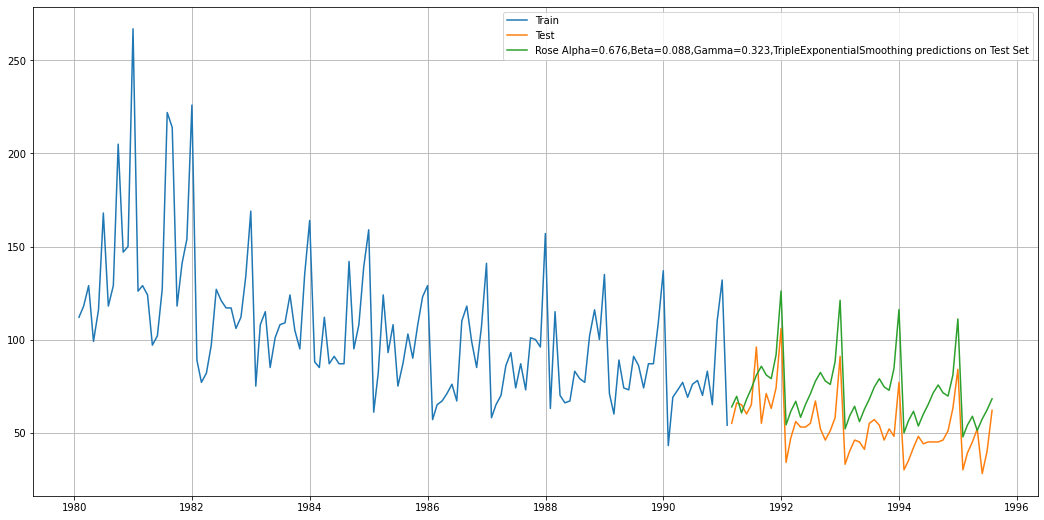

In [1125]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(rTES_train['Rose'], label='Train')
plt.plot(rTES_test['Rose'], label='Test')

plt.plot(rTES_test['auto_predict'], label='Rose Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.savefig("31.jpg")

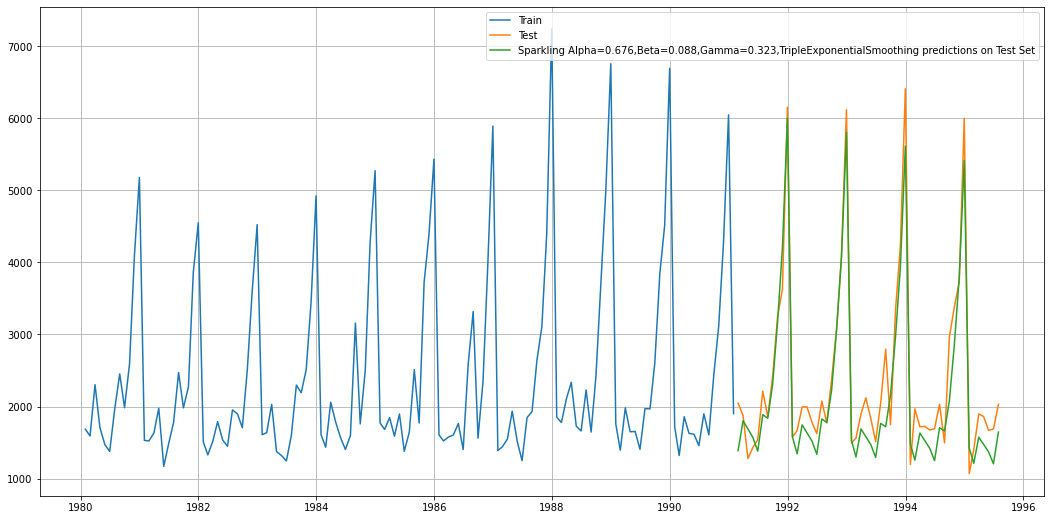

In [1126]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(sTES_train['Sparkling'], label='Train')
plt.plot(sTES_test['Sparkling'], label='Test')

plt.plot(sTES_test['auto_predict'], label='Sparkling Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.savefig("32.jpg")

In [1127]:
## Test Data

rrmse_model6_test_1 = metrics.mean_squared_error(rTES_test['Rose'],rTES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.505


In [1128]:
## Test Data

srmse_model6_test_1 = metrics.mean_squared_error(sTES_test['Sparkling'],sTES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rrmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.505


In [1129]:
rresultsDf_8_1 = pd.DataFrame({'Rose Test RMSE': [rrmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, rresultsDf_8_1])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN

In [1130]:
sresultsDf_8_1 = pd.DataFrame({'Sparkling Test RMSE': [srmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, sresultsDf_8_1])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...             NaN   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...           382.857943

In [1131]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = rmodel_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rTES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            rTES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(rtest['Rose']))
        
            rmse_model8_train = metrics.mean_squared_error(rTES_train['Rose'],rTES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(rTES_test['Rose'],rTES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [1132]:
## First we will define an empty dataframe to store our values from the loop

sresultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = smodel_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            sTES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            sTES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(stest['Sparkling']))
        
            rmse_model8_train = metrics.mean_squared_error(sTES_train['Sparkling'],sTES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(sTES_test['Sparkling'],sTES_test['predict',i,j,k],squared=False)
            
            sresultsDf_8_2 = sresultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [1133]:
resultsDf_8_2.sort_values(by=['Test RMSE'])

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
900           1.0          0.1           0.1  3.590845e+01  1.010052e+01
10            0.1          0.2           0.1  2.543356e+01  1.028523e+01
810           0.9          0.2           0.1  3.635059e+01  1.045684e+01
800           0.9          0.1           0.1  3.471273e+01  1.072278e+01
920           1.0          0.3           0.1  3.966591e+01  1.103376e+01
..            ...          ...           ...           ...           ...
688           0.7          0.9           0.9  1.448627e+06  3.480351e+06
195           0.2          1.0           0.6  1.747521e+03  3.659787e+06
893           0.9          1.0           0.4  5.090875e+03  3.891335e+06
758           0.8          0.6           0.9  7.852378e+03  9.956666e+06
193           0.2          1.0           0.4  3.769154e+05  1.683157e+07

[1000 rows x 5 columns]

In [1134]:
sresultsDf_8_2.sort_values(by=['Test RMSE'])

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
101           0.2          0.1           0.2     378.629369  3.090382e+02
102           0.2          0.1           0.3     370.111799  3.093389e+02
41            0.1          0.5           0.2     422.092638  3.110932e+02
32            0.1          0.4           0.3     405.639715  3.180480e+02
23            0.1          0.3           0.4     391.568688  3.253017e+02
..            ...          ...           ...            ...           ...
894           0.9          1.0           0.5   16917.794260  5.238905e+07
858           0.9          0.6           0.9   24350.840782  1.036478e+08
998           1.0          1.0           0.9   82407.519674  1.369424e+08
886           0.9          0.9           0.7  580086.795978  7.146269e+09
888           0.9          0.9           0.9  136809.795192  1.849131e+10

[1000 rows x 5 columns]

In [1135]:
resultsDf_8_3 = pd.DataFrame({'Rose Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...             NaN   
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...       10.100519   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...           382.857943  
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...                  NaN

In [1136]:
resultsDf_8_3 = pd.DataFrame({'Sparkling Test RMSE': [sresultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...             NaN   
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...       10.100519   
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...             NaN   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...           382.857943  
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...                  NaN  
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...           309.038218

### checking stationarity

### for the whole data

In [1137]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

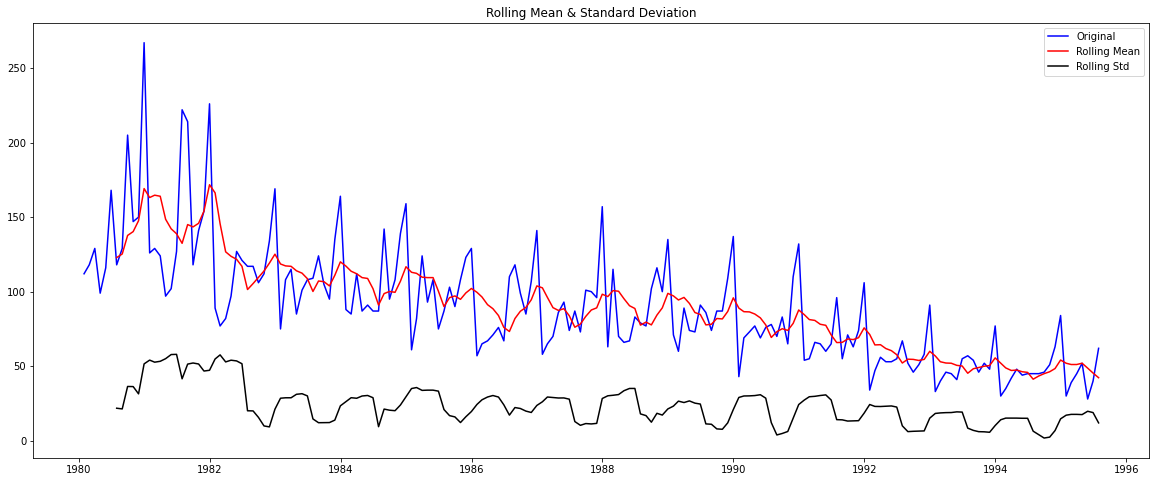

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



<Figure size 1440x576 with 0 Axes>

In [1138]:
test_stationarity(dfr['Rose'])
plt.savefig("rsta.jpg")

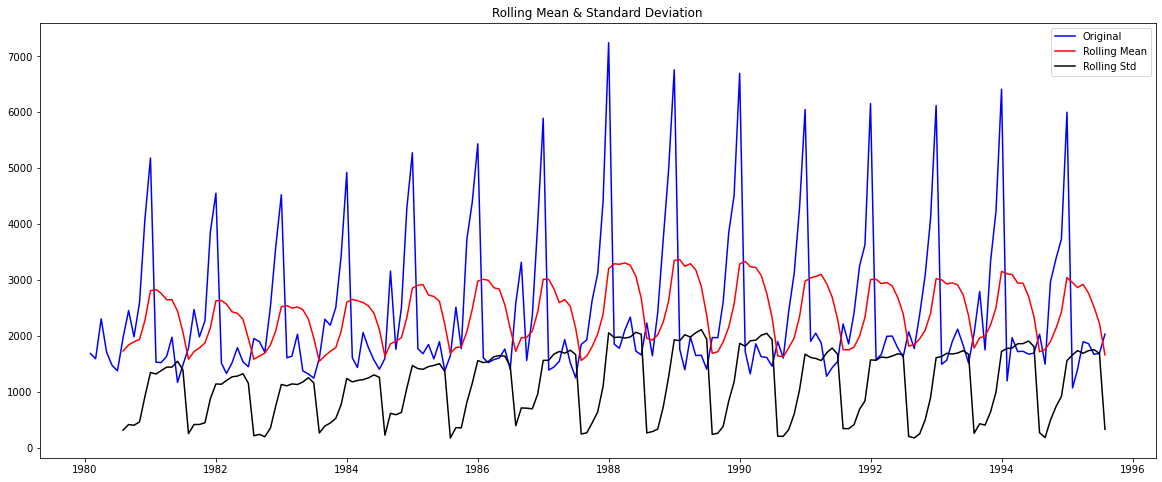

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



<Figure size 1440x576 with 0 Axes>

In [1139]:
test_stationarity(dfs['Sparkling'])
plt.savefig("ssta.jpg")

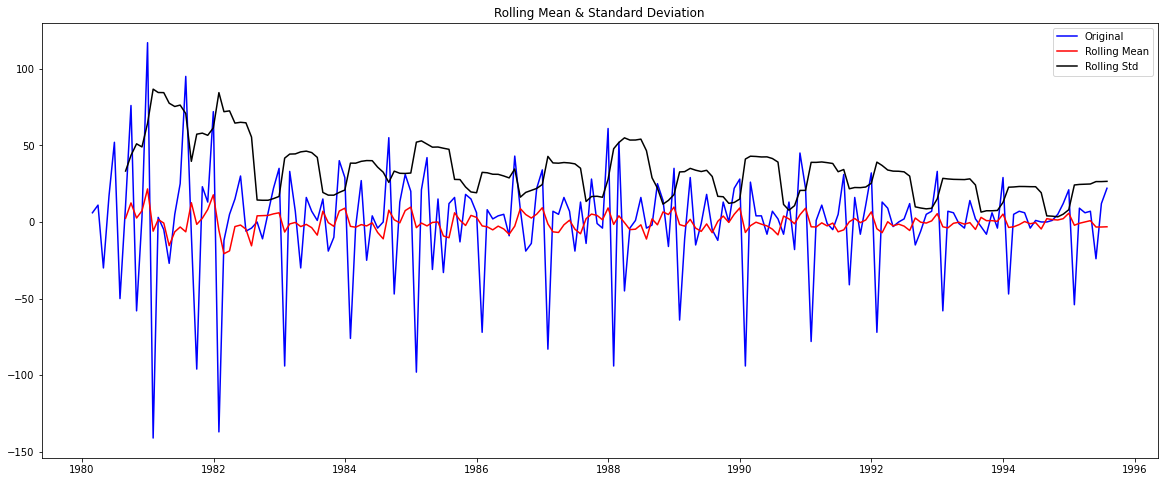

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



<Figure size 1440x576 with 0 Axes>

In [1140]:
test_stationarity(dfr['Rose'].diff().dropna())
plt.savefig("r2sta.jpg")

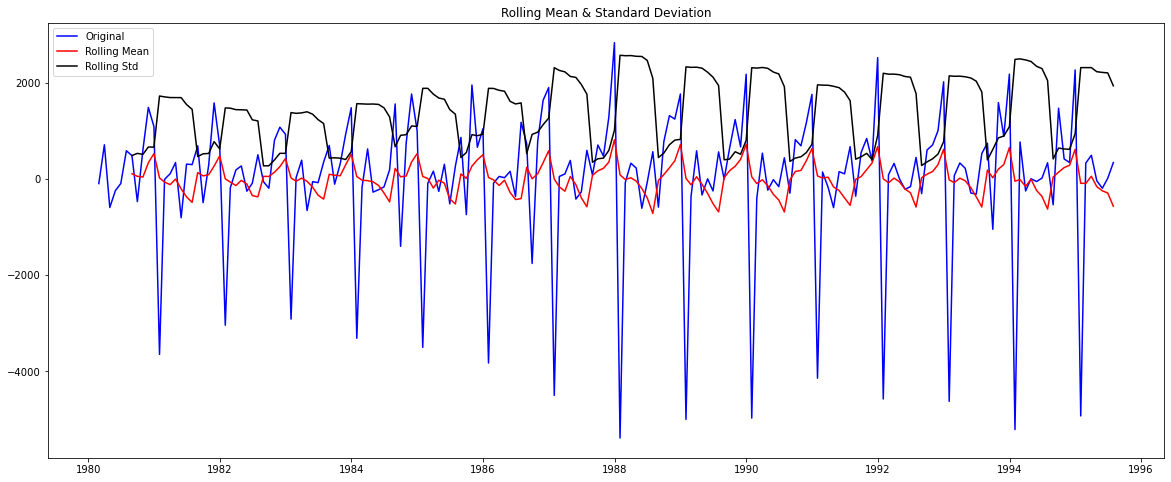

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



<Figure size 1440x576 with 0 Axes>

In [1141]:
test_stationarity(dfs['Sparkling'].diff().dropna())
plt.savefig("s2sta.jpg")

In [1142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

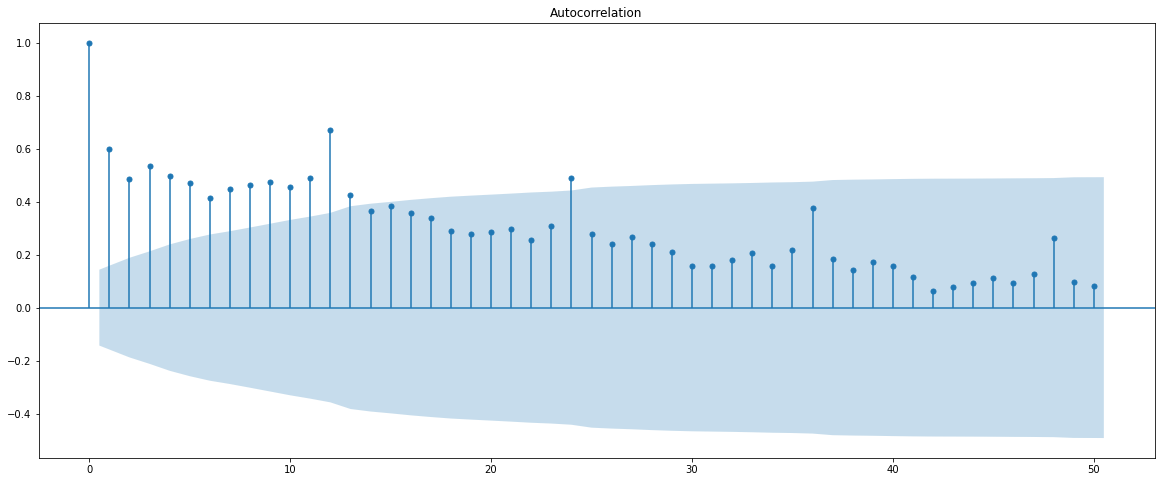

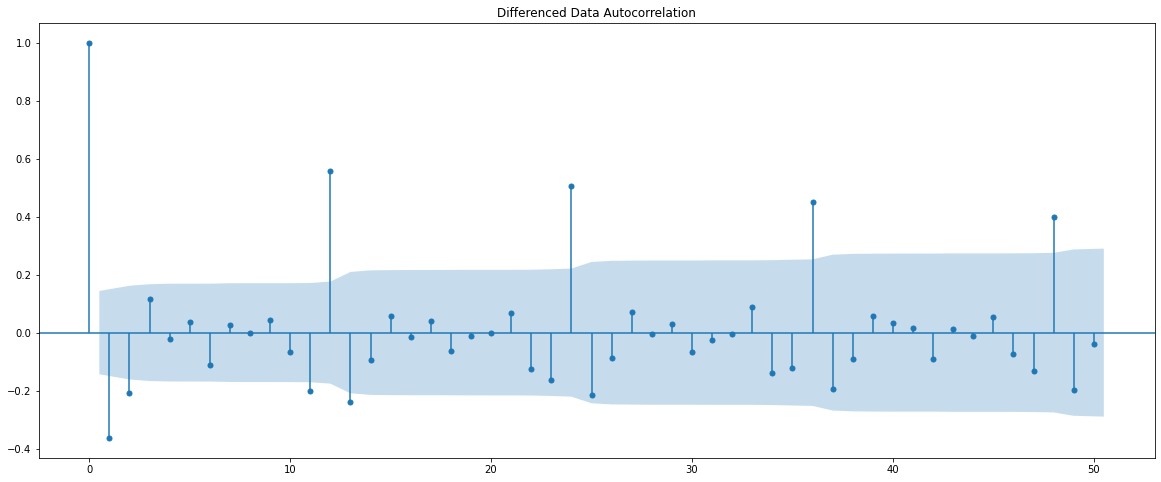

In [1143]:
plot_acf(dfr['Rose'],lags=50)
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

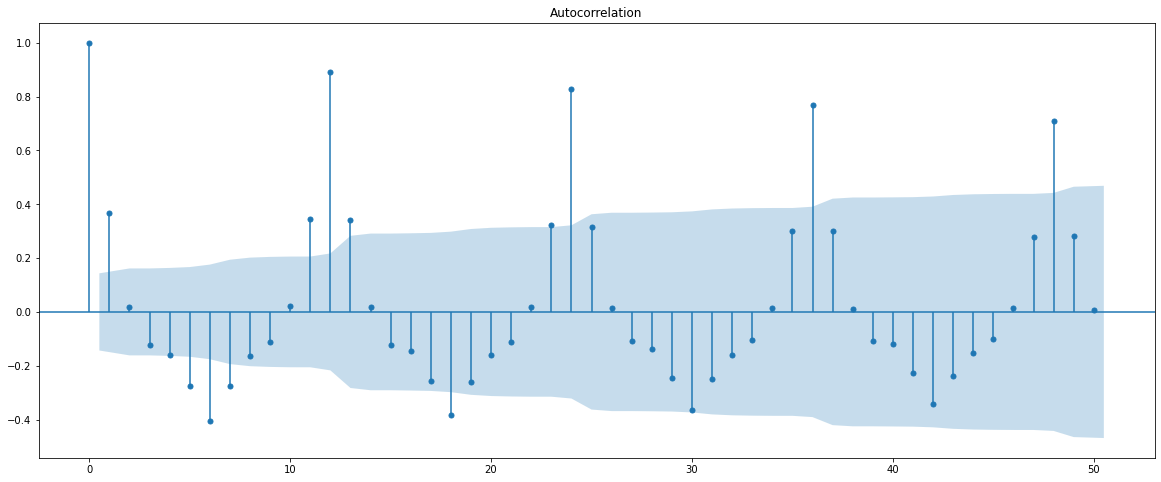

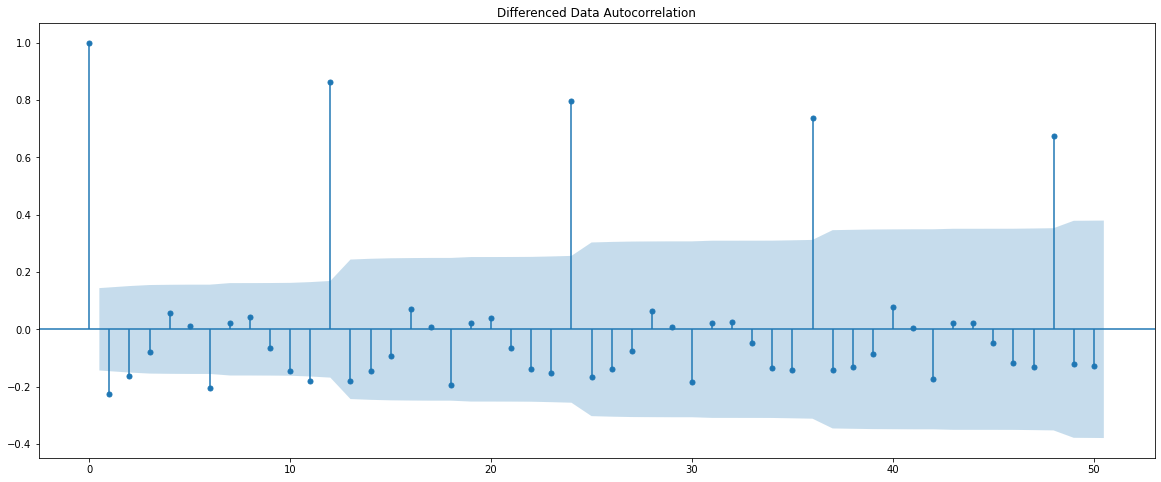

In [1144]:
plot_acf(dfs['Sparkling'],lags=50)
plot_acf(dfs['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### for train and test

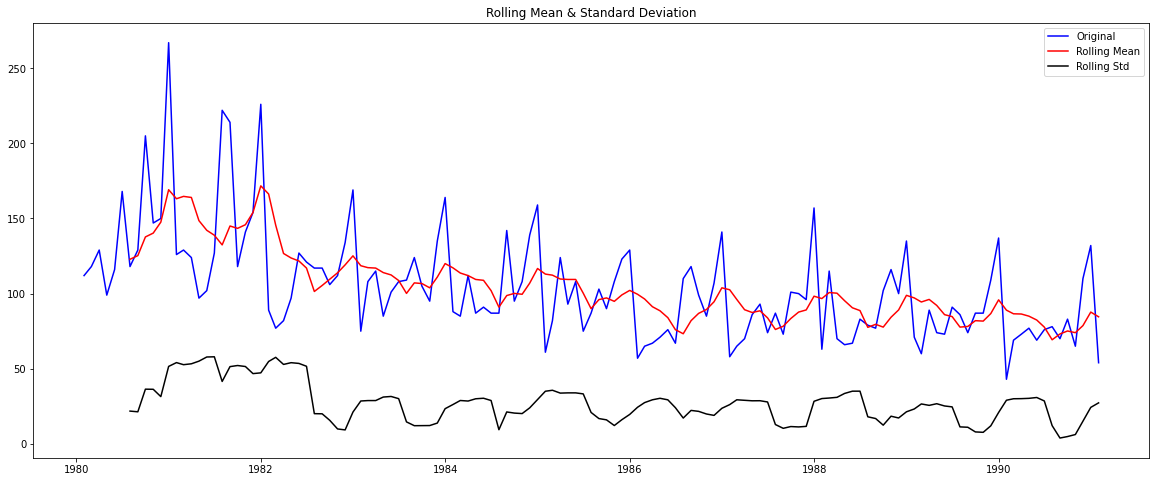

Results of Dickey-Fuller Test:
Test Statistic                  -2.164965
p-value                          0.219206
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [1145]:
test_stationarity(rtrain['Rose'])

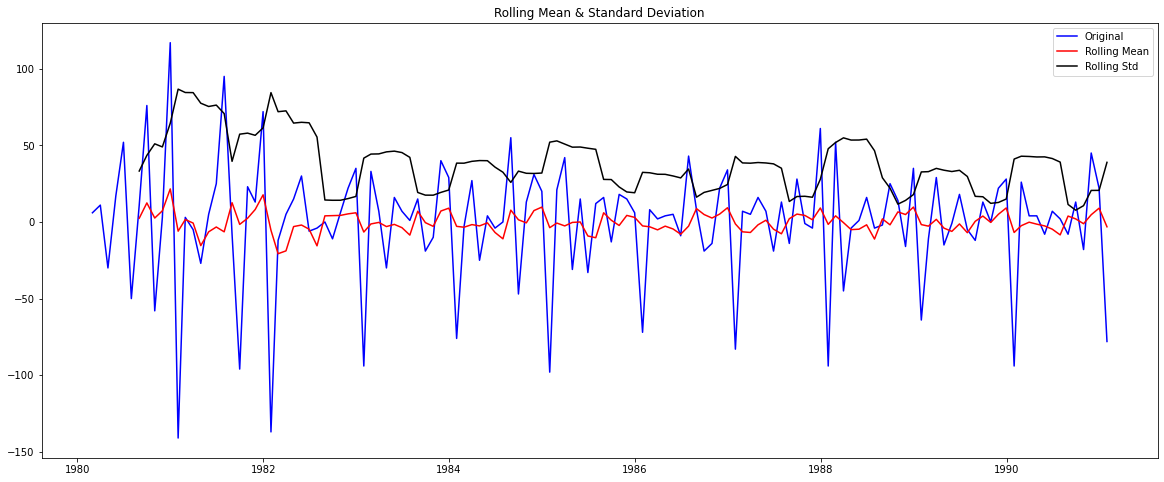

Results of Dickey-Fuller Test:
Test Statistic                -6.646107e+00
p-value                        5.260783e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [1146]:
test_stationarity(rtrain['Rose'].diff().dropna())

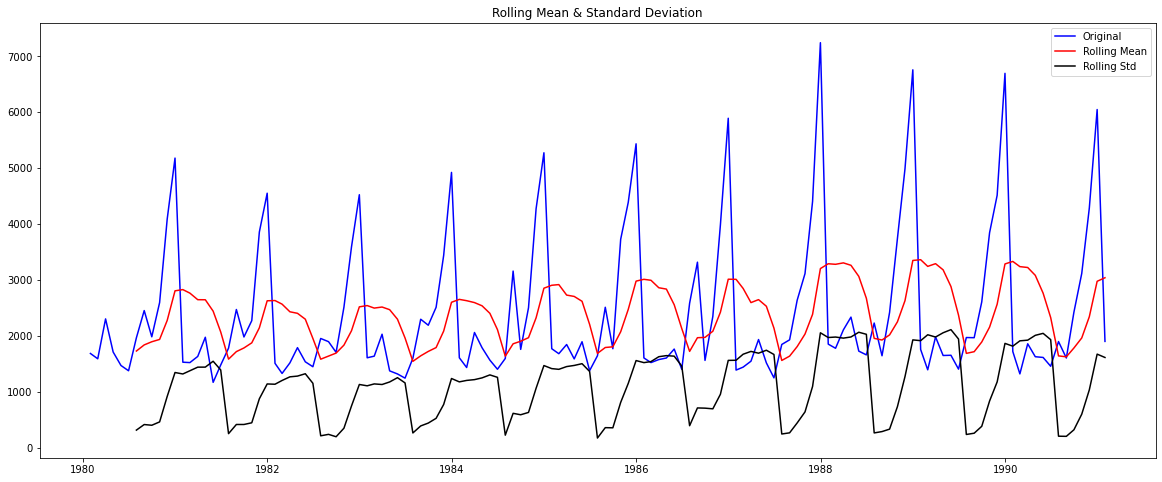

Results of Dickey-Fuller Test:
Test Statistic                  -1.203905
p-value                          0.671913
#Lags Used                      12.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [1147]:
test_stationarity(strain['Sparkling'])

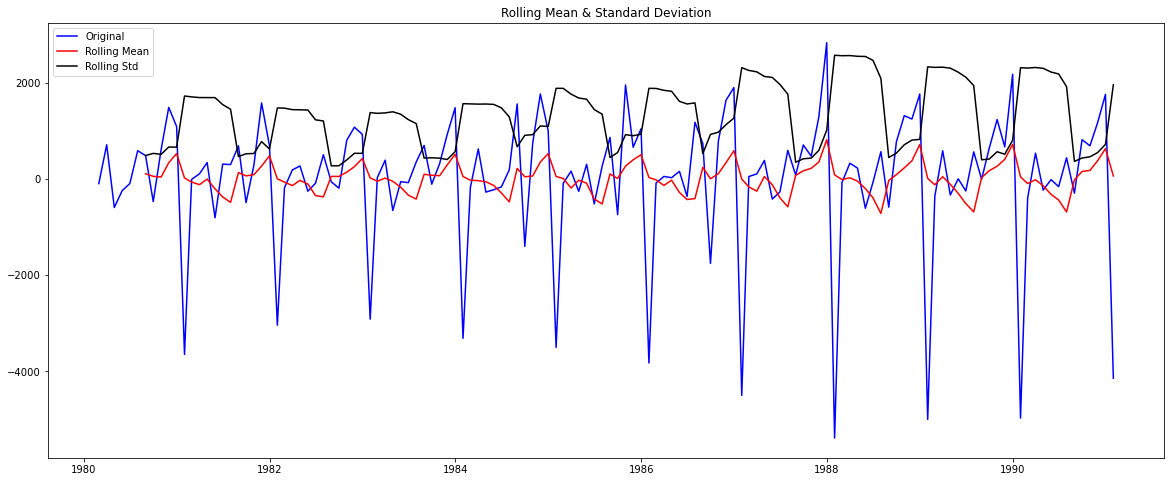

Results of Dickey-Fuller Test:
Test Statistic                -8.170271e+00
p-value                        8.660417e-13
#Lags Used                     1.100000e+01
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64 



In [1148]:
test_stationarity(strain['Sparkling'].diff().dropna())

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model

#### for rose

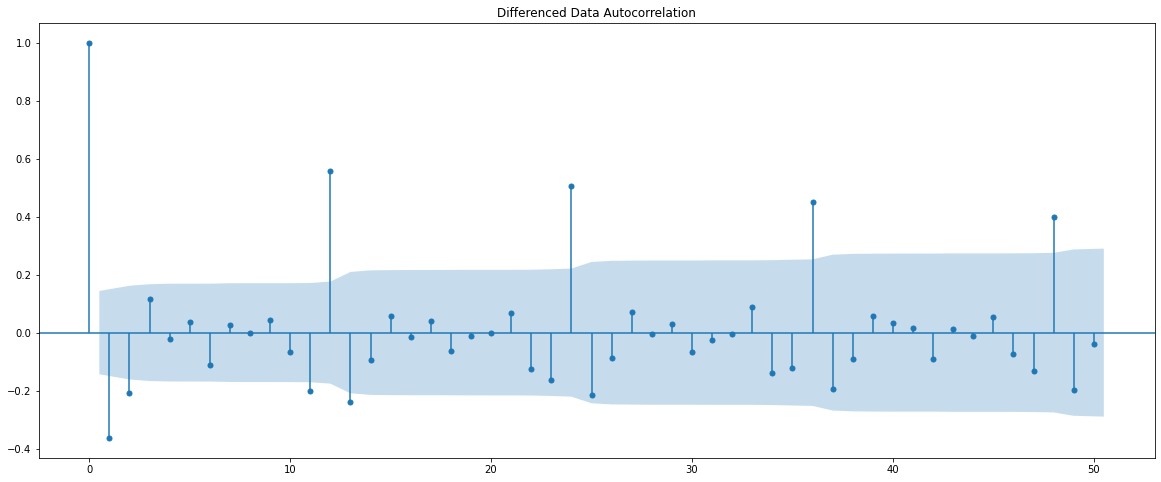

In [1149]:
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 5 as well as 11. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [1150]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1337.085435720141
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1277.6945717432895
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1154.5911456337255
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1287.8974782659836
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1254.6080807719306
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1156.2438260802
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1147.4621876207589
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1147.2539239336184
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1126.5825433671098
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1273.3863931141386
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1211.3774501259315
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1105.6174481439818
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1232.3746094994958
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1169.4482559105752
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1093.6976695195324
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1103.965874924638
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1105.2325721085285
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1061.151753881459
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [1153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1049.565952
26  (0, 1, 2)  (2, 0, 2, 6)  1051.916960
80  (2, 1, 2)  (2, 0, 2, 6)  1054.370254
71  (2, 1, 1)  (2, 0, 2, 6)  1059.759648
44  (1, 1, 1)  (2, 0, 2, 6)  1061.078745

In [1154]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  133
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -516.783
Date:                           Thu, 09 Sep 2021   AIC                           1049.566
Time:                                   08:48:03   BIC                           1071.663
Sample:                                        0   HQIC                          1058.537
                                           - 133                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5956      0.148     -4.027      0.000      -0.885      -0.306
ma.L1         -0.1915    531.305     -0.000

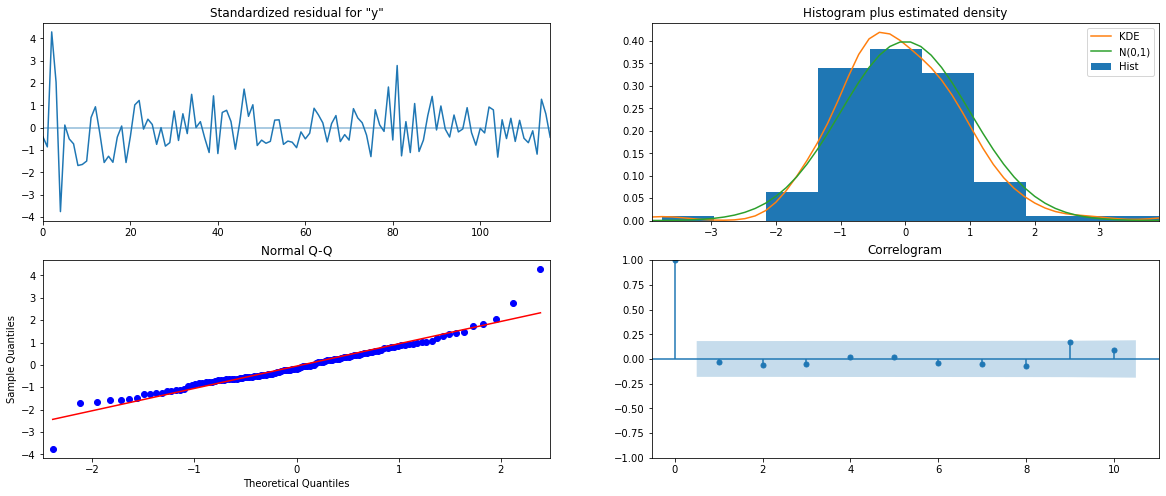

<Figure size 1440x576 with 0 Axes>

In [1155]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()
plt.savefig("Sarimax1.jpg")

In [1156]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(rtest))

In [1157]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  65.448483  18.776928      28.646379     102.250586
1  75.349986  19.244279      37.631892     113.068080
2  70.277858  19.354453      32.343828     108.211889
3  76.006419  19.424867      37.934379     114.078459
4  74.532631  19.431069      36.448437     112.616826

In [1158]:
rrmse = metrics.mean_squared_error(rtest['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rrmse)

25.81171809765495


In [1159]:
temp_resultsDf = pd.DataFrame({'Rose Test RMSE': [rrmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf ])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...             NaN   
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...       10.100519   
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...             NaN   
SARIMA(1,1,2)(2,0,2,6)                                   25.811718   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...           382.857943  
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...                  NaN  
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...           309.038218  
SARIMA(1,1,2)(2,0,2,6)                                              NaN

#### for sparkling

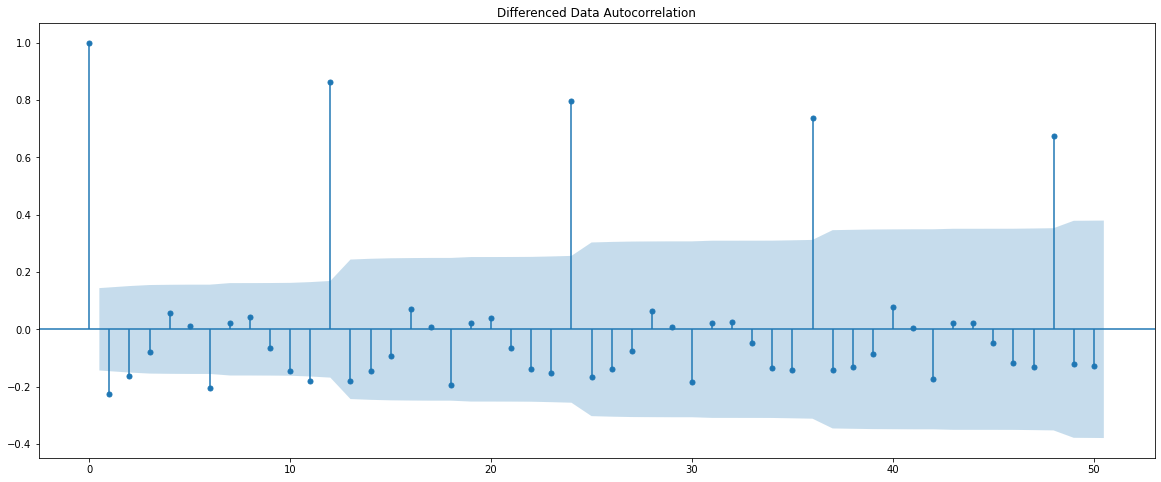

In [1160]:
plot_acf(dfs['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [1161]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1162]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1163]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2177.258796947722
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1975.4080224215097
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2189.1670399625896
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2097.245345871486
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1943.6309087628504
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1854.8097940366943
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1856.606689488849
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1829.195922824292
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2251.881537814377
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2138.1037781655577
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1933.45042327203
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2157.6272693314877
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2022.1301674933054
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1870.4583322374904
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1813.127652442955
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1814.9381303773553
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1756.9539325258104
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:220

In [1164]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1743.150358
53  (1, 1, 2)  (2, 0, 2, 6)  1743.399399
80  (2, 1, 2)  (2, 0, 2, 6)  1745.128787
17  (0, 1, 1)  (2, 0, 2, 6)  1756.953933
44  (1, 1, 1)  (2, 0, 2, 6)  1758.602763

In [1165]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  133
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -864.575
Date:                           Thu, 09 Sep 2021   AIC                           1743.150
Time:                                   08:48:29   BIC                           1762.486
Sample:                                        0   HQIC                          1751.000
                                           - 133                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8066      0.103     -7.868      0.000      -1.008      -0.606
ma.L2         -0.0943      0.112     -0.844

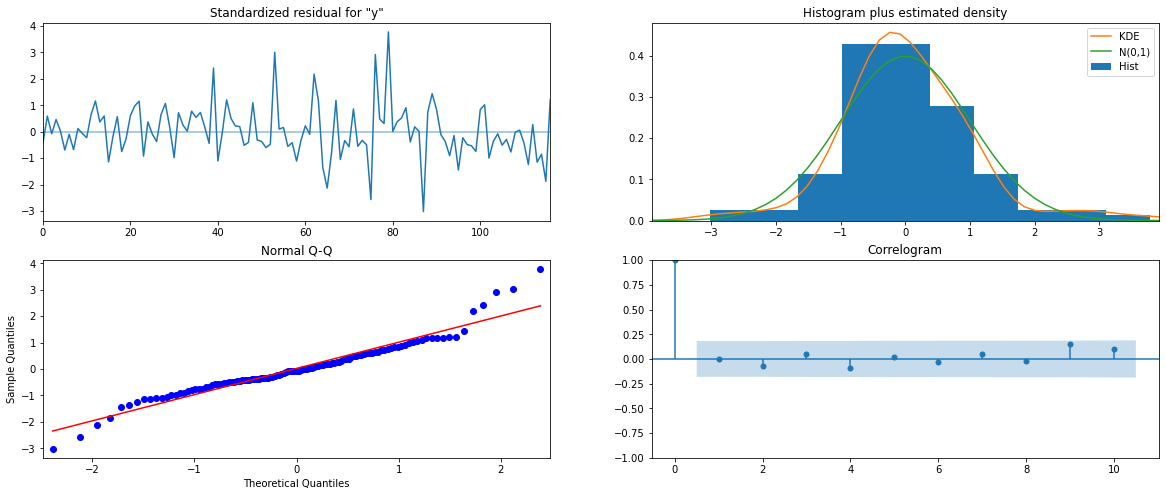

<Figure size 1440x576 with 0 Axes>

In [1166]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()
plt.savefig("sarimax2.jpg")

In [1167]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(stest))

In [1168]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1257.990043  385.080291     503.246540    2012.733545
1  1763.473879  392.212799     994.750918    2532.196839
2  1614.796162  394.063468     842.445957    2387.146368
3  1453.039421  395.905556     677.078791    2229.000052
4  1233.729546  397.739143     454.175150    2013.283941

In [1169]:
srmse =metrics.mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(srmse)

494.2167709077593


In [1170]:
temp_resultsDf = pd.DataFrame({'Sparkling Test RMSE': [srmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf ])
resultsDf

Rose Test RMSE  \
Rose RegressionOnTime                                    51.554113   
Sparkling RegressionOnTime                                     NaN   
NaiveModel                                               15.915867   
NaiveModel                                                     NaN   
SimpleAverageModel                                     2346.228164   
SimpleAverageModel                                             NaN   
Alpha=0.995,SimpleExponentialSmoothing                   33.970592   
Alpha=0.995,SimpleExponentialSmoothing                         NaN   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...       20.504660   
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...             NaN   
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...       10.100519   
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...             NaN   
SARIMA(1,1,2)(2,0,2,6)                                   25.811718   
SARIMA(0,1,2)(2,0,2,6)                                         NaN   

                                                    Sparkling Test RMSE  
Rose RegressionOnTime                                               NaN  
Sparkling RegressionOnTime                                  1286.310050  
NaiveModel                                                          NaN  
NaiveModel                                                  1381.177135  
SimpleAverageModel                                                  NaN  
SimpleAverageModel                                          1285.039964  
Alpha=0.995,SimpleExponentialSmoothing                              NaN  
Alpha=0.995,SimpleExponentialSmoothing                      2656.047647  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...                  NaN  
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...           382.857943  
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...                  NaN  
Alpha=0.2.0,Beta=0.1,Gamma=0.2,TripleExponentia...           309.038218  
SARIMA(1,1,2)(2,0,2,6)                                              NaN  
SARIMA(0,1,2)(2,0,2,6)                                       494.216771

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

## predict for rose data

In [1171]:
model_TES_rose = ExponentialSmoothing(dfr['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.1,smoothing_seasonal=0.1,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-1171-b6e4e1a42d08>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.1,smoothing_seasonal=0.1,optimized=True,use_brute=True)


In [1172]:
rmse_rose_tes_full = metrics.mean_squared_error(dfr['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f" %(rmse_rose_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 16.782


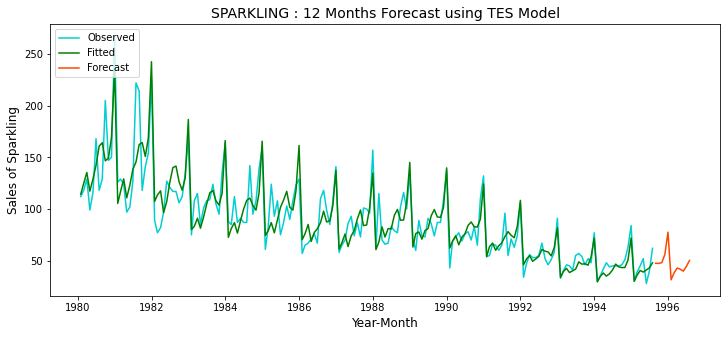

In [1173]:
plt.figure(figsize=(12,5))

plt.plot(dfr['Rose'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_rose_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)
plt.savefig("furr.jpg")

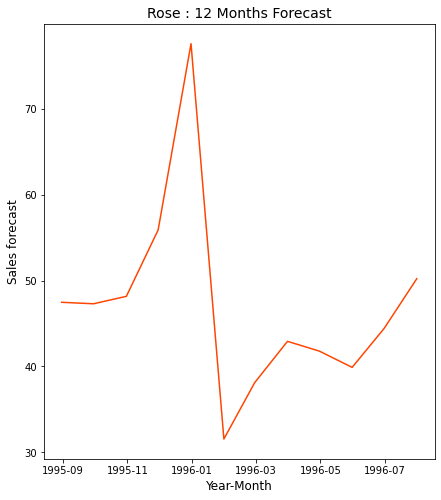

In [1204]:
plt.figure(figsize=(7,8))
plt.plot(TES_rose_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('Rose : 12 Months Forecast', fontsize=14)
plt.savefig("12mont.jpg")

#### sarimax for predicting

In [1175]:
rose_log_trans = np.log10(dfr['Rose'])

In [1176]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.149
Date:                            Thu, 09 Sep 2021   AIC                           1342.298
Time:                                    08:48:32   BIC                           1363.825
Sample:                                01-31-1980   HQIC                          1351.039
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0916      0.084      1.096      0.273      -0.072       0.255
ar.L2         -0.1078      0.077   

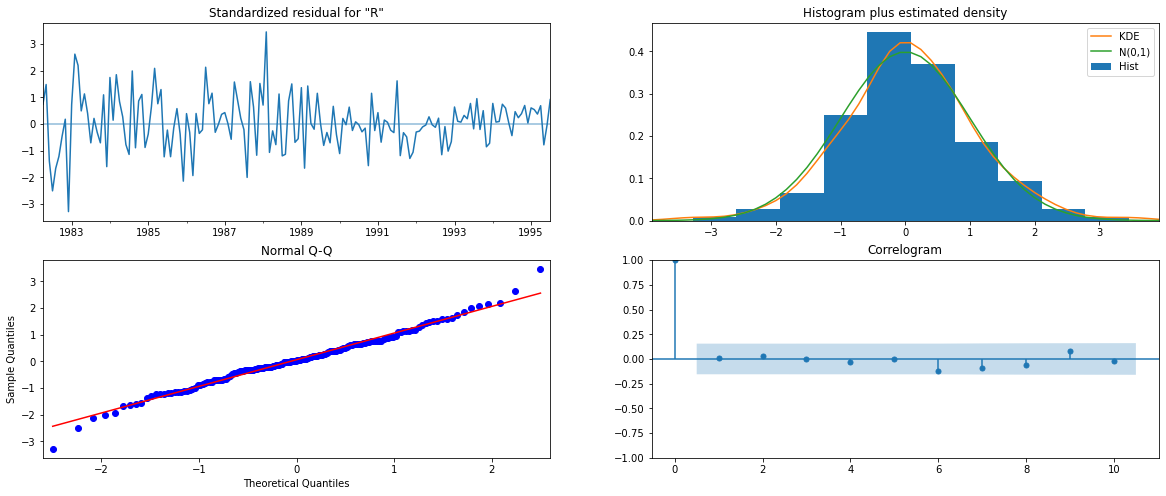

In [1177]:
results_full_data_model_rose.plot_diagnostics();
plt.savefig("sarimaxfuture.jpg")

In [1178]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.273153  15.246684      16.390202      76.156104
1995-09-30  45.492631  15.770990      14.582059      76.403203
1995-10-31  46.194690  15.829709      15.169031      77.220349
1995-11-30  54.295079  15.832964      23.263039      85.327118
1995-12-31  82.211758  15.836931      51.171944     113.251572

In [1179]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(dfr['Rose'],results_full_data_model_rose.fittedvalues,squared=False)


print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f " %(rmse_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.678 


In [1180]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [1181]:
results_full_data_model_rose.fittedvalues.head()

Time_Stamp
1980-01-31      0.000000
1980-02-29    115.420338
1980-03-31    114.399727
1980-04-30    123.946078
1980-05-31     92.213570
dtype: float64

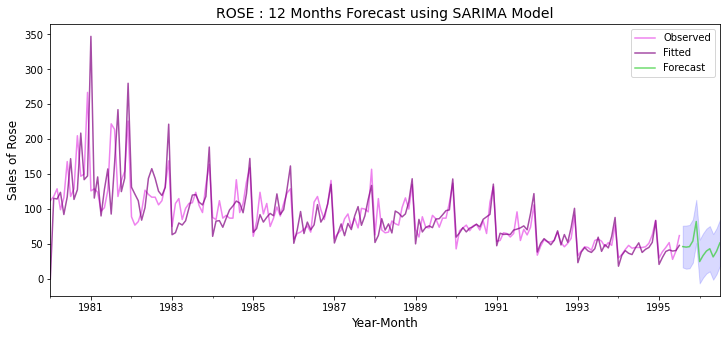

<Figure size 1440x576 with 0 Axes>

In [1182]:
plt.figure(figsize=(12,5))

axis = dfr['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()
plt.savefig("33.jpg")

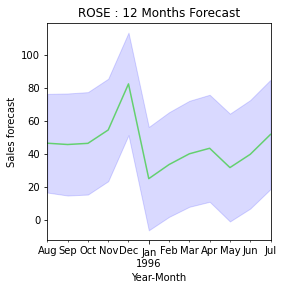

In [1183]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)
plt.savefig("34.jpg")

In [1184]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.27
1995-09-30  45.49
1995-10-31  46.19
1995-11-30  54.30
1995-12-31  82.21
1996-01-31  24.80
1996-02-29  33.35
1996-03-31  39.86
1996-04-30  43.21
1996-05-31  31.52
1996-06-30  39.55
1996-07-31  51.61

In [1185]:
forecast2.describe()

ROSE
count  12.000000
mean   44.863333
std    14.468179
min    24.800000
25%    38.000000
50%    44.350000
75%    47.605000
max    82.210000

In [1186]:
forecast2.sum()

ROSE    538.36
dtype: float64

## predict for sparkling data

In [1187]:
model_TES_spark = ExponentialSmoothing(dfs['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.2,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_spark_forecast = model_TES_spark_fit.forecast(steps=12)

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-1187-0fe4149c0504>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_TES_spark_fit = model_TES_spark.fit(smoothing_level=0.2,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=True,use_brute=True)


In [1188]:
rmse_spark_tes_full = metrics.mean_squared_error(dfs['Sparkling'],model_TES_spark_fit.fittedvalues,squared=False)

print("TES forecast on the Sparkling Full Data:  RMSE is %3.3f " %(rmse_spark_tes_full))

TES forecast on the Sparkling Full Data:  RMSE is 360.335 


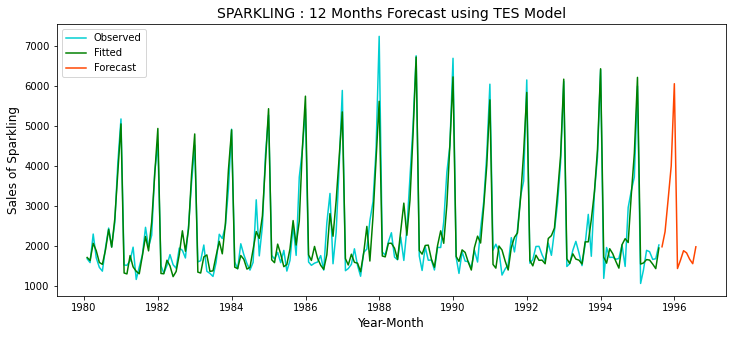

In [1189]:
plt.figure(figsize=(12,5))

plt.plot(dfs['Sparkling'], label='Observed', color = 'darkturquoise')
plt.plot(model_TES_spark_fit.fittedvalues, label='Fitted', color = 'green')
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using TES Model', fontsize=14)
plt.savefig("furs.jpg")


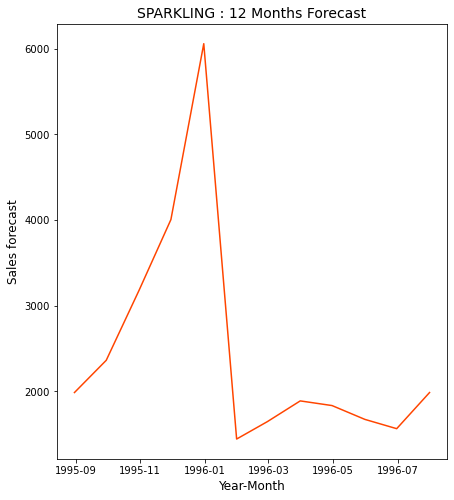

In [1203]:
plt.figure(figsize=(7,8))
plt.plot(TES_spark_forecast, label='Forecast', color = 'orangered')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast', fontsize=14)
plt.savefig("sfur12.jpg")

### sarimax for prediction

In [1191]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(dfs['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\mandira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.437
Date:                                 Thu, 09 Sep 2021   AIC                           2176.875
Time:                                         08:48:42   BIC                           2206.711
Sample:                                     01-31-1980   HQIC                          2188.998
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4230      0.086     -4.914      0.000      -0.592      -0

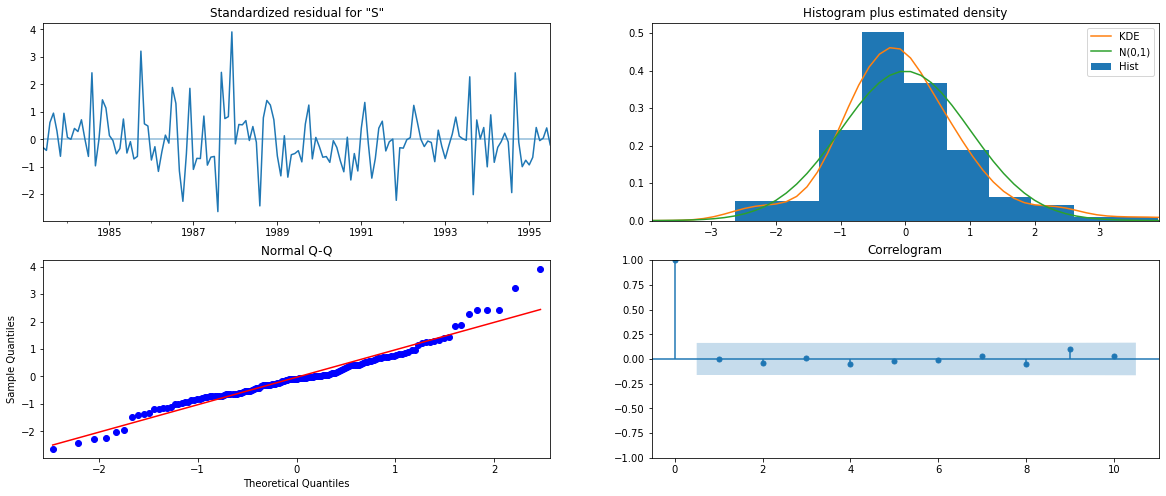

In [1192]:
results_full_data_model_spark.plot_diagnostics();
plt.savefig("fusari.jpg")

In [1193]:

predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [1194]:
predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1873.386261  384.579457    1119.624376    2627.148146
1995-09-30  2444.939414  389.595143    1681.346965    3208.531863
1995-10-31  3312.598542  390.289899    2547.644396    4077.552688
1995-11-30  3994.605734  390.800156    3228.651503    4760.559964
1995-12-31  6084.081330  390.931195    5317.870268    6850.292392

In [1195]:
rmse_spark_sarima_full = metrics.mean_squared_error(dfs['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)

print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f " %(rmse_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 591.255 


In [1196]:
dfs.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [1197]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

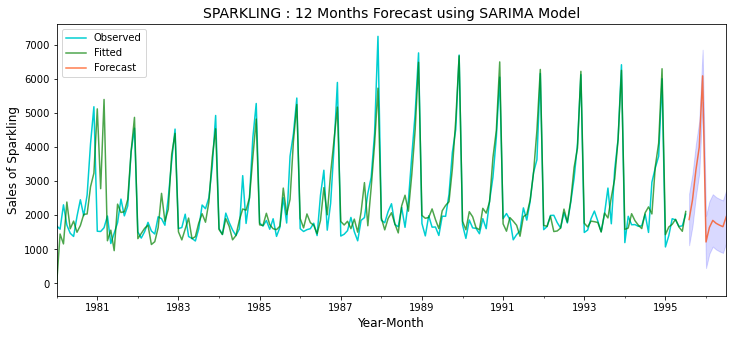

<Figure size 1440x576 with 0 Axes>

In [1198]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = dfs['Sparkling'].plot(label='Observed', color = 'darkturquoise')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7, color = 'green')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()
plt.savefig("34.jpg")

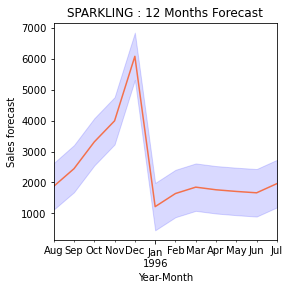

In [1199]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)
plt.savefig("35.jpg")

In [1200]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Sparkling
1995-08-31    1873.39
1995-09-30    2444.94
1995-10-31    3312.60
1995-11-30    3994.61
1995-12-31    6084.08
1996-01-31    1215.91
1996-02-29    1640.57
1996-03-31    1847.28
1996-04-30    1761.99
1996-05-31    1708.30
1996-06-30    1664.02
1996-07-31    1961.28

In [1201]:
forecast.describe()

Sparkling
count    12.000000
mean   2459.080833
std    1384.638657
min    1215.910000
25%    1697.230000
50%    1860.335000
75%    2661.855000
max    6084.080000